In [749]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import tikzplotlib
import seaborn as sns

import json
from datetime import datetime

# Data Validation Exercises

In [11]:
projects_df = pd.read_csv('/root/data2/projects.csv',
                         parse_dates=['project_created_at', 'project_last_pushed_at', 'project_updated_at'])

In [12]:
projects_df

,project_name,project_rank,project_github_clone_url,project_number_of_stars,project_number_of_forks,project_github_id,project_revision,project_created_at,project_last_pushed_at,project_updated_at,project_size,project_checkout_path,project_uses_modules,project_root_module
0,golang/go,1,https://github.com/golang/go.git,72988,10460,23096959,6bf2eea62a3425c57f3d908ec32047a9ae41c025,2014-08-19 04:33:40+00:00,2020-05-28 14:45:33+00:00,2020-05-28 18:49:53+00:00,215283,/root/download/golang/go,False,no-mod
1,kubernetes/kubernetes,2,https://github.com/kubernetes/kubernetes.git,66512,23806,20580498,fb9e1946b0af89998b3e366d49399f6365c94c56,2014-06-06 22:56:04+00:00,2020-05-28 19:09:23+00:00,2020-05-28 18:55:28+00:00,918555,/root/download/kubernetes/kubernetes,True,k8s.io/kubernetes
2,moby/moby,3,https://github.com/moby/moby.git,57189,16540,7691631,763f9e799b7ad2b10e089d546f5a6575ce70f418,2013-01-18 18:10:57+00:00,2020-05-28 18:55:57+00:00,2020-05-28 18:37:46+00:00,153636,/root/download/moby/moby,False,no-mod
3,avelino/awesome-go,4,https://github.com/avelino/awesome-go.git,54733,7267,21540759,3e27d63fe21f95dc41a62dda9b78b2500dc9e0c0,2014-07-06 13:42:15+00:00,2020-05-28 00:00:53+00:00,2020-05-28 18:26:27+00:00,8342,/root/download/avelino/awesome-go,False,no-mod
4,gohugoio/hugo,5,https://github.com/gohugoio/hugo.git,44317,5049,11180687,6a3e89743ccad58097a6dd203a63448946a2304d,2013-07-04 15:26:26+00:00,2020-05-28 17:46:37+00:00,2020-05-28 19:11:19+00:00,88480,/root/download/gohugoio/hugo,True,github.com/gohugoio/hugo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,disintegration/imaging,96,https://github.com/disintegration/imaging.git,3089,271,7042338,879073f2332fabf5a5faa93986ed41598dcf0b62,2012-12-06 20:21:21+00:00,2020-05-26 06:37:58+00:00,2020-05-28 19:09:44+00:00,3438,/root/download/disintegration/imaging,True,github.com/disintegration/imaging
496,gogf/gf,97,https://github.com/gogf/gf.git,3087,450,95761244,269378aa0deaa909348cda1b3bf027f82e52ee66,2017-06-29 09:24:51+00:00,2020-05-28 12:28:20+00:00,2020-05-28 14:38:09+00:00,13103,/root/download/gogf/gf,True,github.com/gogf/gf
497,googleforgames/agones,98,https://github.com/googleforgames/agones.git,3082,356,113473682,d017250c43828b4db4f2d6053f7dafc6695ee4cc,2017-12-07 16:25:22+00:00,2020-05-28 18:00:02+00:00,2020-05-28 17:09:11+00:00,83659,/root/download/googleforgames/agones,True,agones.dev/agones
498,kubernetes-sigs/external-dns,99,https://github.com/kubernetes-sigs/external-dn...,3078,926,81497153,deaeca2ab17fe1f7264cfce02f86be8feed5fc2b,2017-02-09 21:34:27+00:00,2020-05-28 17:00:34+00:00,2020-05-28 12:08:41+00:00,53675,/root/download/kubernetes-sigs/external-dns,True,sigs.k8s.io/external-dns


In [1126]:
packages_df = pd.read_csv('/root/data2/packages_0_499.csv').dropna()

In [1017]:
packages_df['package_unsafe_sum'].sum()

1990791

In [1021]:
packages_df['package_hop_count'].mean()

2.858373182394847

In [1022]:
packages_df[packages_df['package_unsafe_sum']>0]['package_hop_count'].mean()

2.4258721911060124

In [1023]:
packages_df['project_name'].nunique()

343

In [1024]:
packages_df[(packages_df['package_unsafe_sum']>0)&(packages_df['project_name']=='kubernetes/kubernetes')]\
    .groupby(['project_name', 'package_hop_count']).size().unstack().fillna(0)

package_hop_count,0,1,2,3,4,5,6,7
project_name,,,,,,,,
kubernetes/kubernetes,2,36,85,35,18,13,2,3


In [1025]:
packages_df[(packages_df['package_unsafe_sum']>0)&(packages_df['project_name']=='kubernetes/kubernetes')].count()

name                                         194
import_path                                  194
dir                                          194
is_standard                                  194
is_dep_only                                  194
number_of_go_files                           194
loc                                          194
byte_size                                    194
module_path                                  194
module_version                               194
module_registry                              194
module_is_indirect                           194
project_name                                 194
package_hop_count                            194
package_unsafe_sum                           194
package_geiger_unsafe_pointer_sum            194
package_geiger_unsafe_pointer_variable       194
package_geiger_unsafe_pointer_parameter      194
package_geiger_unsafe_pointer_assignment     194
package_geiger_unsafe_pointer_call           194
package_geiger_unsaf

In [1127]:
geiger_df = pd.read_csv('/root/data2/geiger/geiger_findings_0_499.csv')

In [1128]:
geiger_df[geiger_df['file_name'].str.contains('.cache/go-build')]['package_import_path'].nunique()

51

In [1028]:
geiger_df

,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,package_dir,module_path,module_version,project_name
0,var CacheLineSize uintptr = CacheLinePadSize,type CacheLinePad struct{ _ [CacheLinePadSize]...,20,19,787,uintptr,variable,cpu.go,245,7184,internal/cpu,/usr/local/go/src/internal/cpu,std,std,kubernetes/kubernetes
1,offsetX86HasSSE2 = unsafe.Offsetof(cpu.X86.H...,"\t""unsafe""\n)\n\n// Offsets into internal/cpu ...",14,23,303,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes
2,offsetX86HasSSE42 = unsafe.Offsetof(cpu.X86.H...,)\n\n// Offsets into internal/cpu records for ...,15,23,358,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes
3,offsetX86HasAVX2 = unsafe.Offsetof(cpu.X86.H...,\n// Offsets into internal/cpu records for use...,16,23,414,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes
4,offsetX86HasPOPCNT = unsafe.Offsetof(cpu.X86.H...,// Offsets into internal/cpu records for use i...,17,23,469,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990786,raw := (*unix.InotifyEvent)(unsafe.Pointer(&bu...,\t\tvar offset uint32\n\t\t// We don't know ho...,244,32,6452,unsafe.Pointer,assignment,inotify.go,337,9452,github.com/fsnotify/fsnotify,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,github.com/fsnotify/fsnotify,v1.4.7,gwuhaolin/livego
1990787,bytes := (*[unix.PathMax]byte)(unsafe.Pointer(...,\t\t\t}\n\t\t\tw.mu.Unlock()\n\n\t\t\tif nameL...,275,36,7508,unsafe.Pointer,assignment,inotify.go,337,9452,github.com/fsnotify/fsnotify,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,github.com/fsnotify/fsnotify,v1.4.7,gwuhaolin/livego
1990788,func http2errno(v error) uintptr {,"\n// errno returns v's underlying uintptr, els...",4228,26,145355,uintptr,parameter,h2_bundle.go,10277,328343,net/http,/usr/local/go/src/net/http,std,std,gwuhaolin/livego
1990789,return uintptr(rv.Uint()),//\n// TODO: remove this helper function once ...,4230,10,145435,uintptr,assignment,h2_bundle.go,10277,328343,net/http,/usr/local/go/src/net/http,std,std,gwuhaolin/livego


In [1129]:
geiger_df.count()

text                   1990791
context                1990791
line_number            1990791
column                 1990791
absolute_offset        1990791
match_type             1990791
context_type           1990791
file_name              1990791
file_loc               1990791
file_byte_size         1990791
package_import_path    1990791
package_dir            1990791
module_path            1990791
module_version         1990791
project_name           1990791
dtype: int64

In [1030]:
item = geiger_df[geiger_df['text'].notna()].iloc[42]

print(item.context)
print("---")
print(item.text)
print("---")
print(item.file_name + ":" + str(item.line_number))


// in asm_*.s
func memhash(p unsafe.Pointer, h, s uintptr) uintptr
func memhash32(p unsafe.Pointer, h uintptr) uintptr
func memhash64(p unsafe.Pointer, h uintptr) uintptr
func strhash(p unsafe.Pointer, h uintptr) uintptr

func strhashFallback(a unsafe.Pointer, h uintptr) uintptr {
	x := (*stringStruct)(a)
	return memhashFallback(x.str, h, uintptr(x.len))
}
---
func strhash(p unsafe.Pointer, h uintptr) uintptr
---
alg.go:69


In [1130]:
pd.merge(geiger_df, packages_df, how='left',
         left_on=['package_import_path', 'module_path', 'module_version', 'project_name'],
         right_on=['import_path', 'module_path', 'module_version', 'project_name'],
         validate='many_to_one').iloc[:,:20]

,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,package_dir,module_path,module_version,project_name,name,import_path,dir,is_standard,is_dep_only
0,var CacheLineSize uintptr = CacheLinePadSize,type CacheLinePad struct{ _ [CacheLinePadSize]...,20,19,787,uintptr,variable,cpu.go,245,7184,internal/cpu,/usr/local/go/src/internal/cpu,std,std,kubernetes/kubernetes,cpu,internal/cpu,/usr/local/go/src/internal/cpu,True,True
1,offsetX86HasSSE2 = unsafe.Offsetof(cpu.X86.H...,"\t""unsafe""\n)\n\n// Offsets into internal/cpu ...",14,23,303,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes,bytealg,internal/bytealg,/usr/local/go/src/internal/bytealg,True,True
2,offsetX86HasSSE42 = unsafe.Offsetof(cpu.X86.H...,)\n\n// Offsets into internal/cpu records for ...,15,23,358,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes,bytealg,internal/bytealg,/usr/local/go/src/internal/bytealg,True,True
3,offsetX86HasAVX2 = unsafe.Offsetof(cpu.X86.H...,\n// Offsets into internal/cpu records for use...,16,23,414,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes,bytealg,internal/bytealg,/usr/local/go/src/internal/bytealg,True,True
4,offsetX86HasPOPCNT = unsafe.Offsetof(cpu.X86.H...,// Offsets into internal/cpu records for use i...,17,23,469,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes,bytealg,internal/bytealg,/usr/local/go/src/internal/bytealg,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990786,raw := (*unix.InotifyEvent)(unsafe.Pointer(&bu...,\t\tvar offset uint32\n\t\t// We don't know ho...,244,32,6452,unsafe.Pointer,assignment,inotify.go,337,9452,github.com/fsnotify/fsnotify,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,github.com/fsnotify/fsnotify,v1.4.7,gwuhaolin/livego,fsnotify,github.com/fsnotify/fsnotify,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,False,True
1990787,bytes := (*[unix.PathMax]byte)(unsafe.Pointer(...,\t\t\t}\n\t\t\tw.mu.Unlock()\n\n\t\t\tif nameL...,275,36,7508,unsafe.Pointer,assignment,inotify.go,337,9452,github.com/fsnotify/fsnotify,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,github.com/fsnotify/fsnotify,v1.4.7,gwuhaolin/livego,fsnotify,github.com/fsnotify/fsnotify,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,False,True
1990788,func http2errno(v error) uintptr {,"\n// errno returns v's underlying uintptr, els...",4228,26,145355,uintptr,parameter,h2_bundle.go,10277,328343,net/http,/usr/local/go/src/net/http,std,std,gwuhaolin/livego,http,net/http,/usr/local/go/src/net/http,True,True
1990789,return uintptr(rv.Uint()),//\n// TODO: remove this helper function once ...,4230,10,145435,uintptr,assignment,h2_bundle.go,10277,328343,net/http,/usr/local/go/src/net/http,std,std,gwuhaolin/livego,http,net/http,/usr/local/go/src/net/http,True,True


In [415]:
projects = list(packages_df['project_name'].unique())

for project in projects:
    pkgs_sum = packages_df\
        [packages_df['project_name']==project]\
        .drop_duplicates(subset=['import_path', 'module_version']).dropna()\
        .loc[:,['package_geiger_unsafe_pointer_sum', 'package_geiger_unsafe_sizeof_sum', 'package_geiger_unsafe_offsetof_sum',
               'package_geiger_unsafe_alignof_sum', 'package_geiger_slice_header_sum', 'package_geiger_string_header_sum',
               'package_geiger_uintptr_sum']]\
        .sum().sum()
    geiger_sum = geiger_df\
        [geiger_df['project_name']==project]\
        .drop_duplicates(subset=['package_import_path', 'module_version', 'file_name', 'line_number', 
                                 'column', 'match_type']).dropna()\
        ['text'].count()
    
    if pkgs_sum != geiger_sum:
        print("{}: pkgs={}, geiger={}".format(project, pkgs_sum, geiger_sum))

In [1032]:
packages_df\
    .drop_duplicates(subset=['import_path', 'dir', 'module_path', 'module_version']).dropna()\
    .loc[:,['package_geiger_unsafe_pointer_sum', 'package_geiger_unsafe_sizeof_sum', 'package_geiger_unsafe_offsetof_sum',
           'package_geiger_unsafe_alignof_sum', 'package_geiger_slice_header_sum', 'package_geiger_string_header_sum',
           'package_geiger_uintptr_sum']]\
    .sum()

package_geiger_unsafe_pointer_sum     94431
package_geiger_unsafe_sizeof_sum       3667
package_geiger_unsafe_offsetof_sum      620
package_geiger_unsafe_alignof_sum         8
package_geiger_slice_header_sum         742
package_geiger_string_header_sum        287
package_geiger_uintptr_sum            99741
dtype: int64

In [428]:
geiger_df\
    .drop_duplicates(subset=['package_import_path', 'module_path', 'module_version', 'file_name', 'line_number', 
                             'column', 'match_type']).dropna()\
    ['text'].count()

196689

In [393]:
packages_df.groupby('project_name')['package_unsafe_sum'].sum().sum()

1990791

In [1033]:
packages_df\
    .groupby(['import_path', 'project_name', 'module_path', 'module_version'])['package_unsafe_sum'].sum()\
    .groupby('import_path').agg(different_per_version=lambda x: len(x)!=len(set(x)))\
    .reset_index()\
    .groupby('different_per_version').count()

,import_path
different_per_version,
False,24738
True,5772


In [447]:
packages_df\
    .groupby(['import_path', 'project_name', 'module_path', 'module_version'])['package_unsafe_sum'].sum()

import_path                                    project_name                   module_path                  module_version                      
4d63.com/tz                                    GoogleContainerTools/skaffold  4d63.com/tz                  v1.1.0                                  0
                                               elastic/beats                  4d63.com/tz                  v1.1.1-0.20191124060701-6d37baae851b    0
Yearning-go                                    cookieY/Yearning               Yearning-go                  project                                 0
Yearning-go/src/handle                         cookieY/Yearning               Yearning-go                  project                                 0
Yearning-go/src/lib                            cookieY/Yearning               Yearning-go                  project                                 0
                                                                                                               

In [457]:
packages_df\
    .groupby(['import_path', 'module_version', 'project_name', 'package_unsafe_sum']).size()\
    .groupby(['import_path', 'module_version', 'project_name'])\
    .agg(different_per_version=lambda x: len(x)!=len(set(x)))\
    .reset_index()\
    .sort_values(by='different_per_version')

,import_path,module_version,project_name,different_per_version
0,4d63.com/tz,v1.1.0,GoogleContainerTools/skaffold,False
81984,internal/cpu,std,golang/mock,False
81983,internal/cpu,std,golang/mobile,False
81982,internal/cpu,std,golang/lint,False
81981,internal/cpu,std,golang-migrate/migrate,False
...,...,...,...,...
40980,github.com/hashicorp/vault/builtin/logical/mys...,project,hashicorp/vault,False
40979,github.com/hashicorp/vault/builtin/logical/mysql,project,hashicorp/vault,False
40978,github.com/hashicorp/vault/builtin/logical/mss...,project,hashicorp/vault,False
41306,github.com/henvic/httpretty/internal/color,v0.0.4,cli/cli,False


In [466]:
pkgs = packages_df.drop_duplicates(subset=['import_path', 'module_version']).dropna()

for i, pkg in pkgs.iterrows():
    uniq_count = packages_df[(packages_df['import_path']==pkg['import_path'])&(packages_df['module_version']==pkg['module_version'])]\
            ['package_unsafe_sum'].nunique()
    
    if uniq_count > 1:
        print("{}, {}, {}".format(pkg.import_path, pkg.module_version, uniq_count))

k8s.io/klog, v0.1.0, 2


In [469]:
packages_df[(packages_df['import_path']=='k8s.io/klog')&(packages_df['module_version']=='v0.1.0')]\
    .iloc[:,:15]

,name,import_path,dir,is_standard,is_dep_only,number_of_go_files,loc,byte_size,module_path,module_version,module_registry,module_is_indirect,project_name,package_hop_count,package_unsafe_sum
5679,klog,k8s.io/klog,/root/go/pkg/mod/github.com/simonpasquier/klog...,False,True,1,143,3590,github.com/simonpasquier/klog-gokit,v0.1.0,github.com,False,prometheus/prometheus,1,0
13776,klog,k8s.io/klog,/root/go/pkg/mod/k8s.io/klog@v0.1.0,False,True,2,1365,41292,k8s.io/klog,v0.1.0,k8s.io,True,drone/drone,4,4
87061,klog,k8s.io/klog,/root/go/pkg/mod/k8s.io/klog@v0.1.0,False,True,2,1365,41292,k8s.io/klog,v0.1.0,k8s.io,True,weaveworks/scope,4,4


In [482]:
df = packages_df\
    .groupby(['import_path', 'module_path', 'module_version', 'project_name'])['package_unsafe_sum'].sum().reset_index()
df

,import_path,module_path,module_version,project_name,package_unsafe_sum
0,4d63.com/tz,4d63.com/tz,v1.1.0,GoogleContainerTools/skaffold,0
1,4d63.com/tz,4d63.com/tz,v1.1.1-0.20191124060701-6d37baae851b,elastic/beats,0
2,Yearning-go,Yearning-go,project,cookieY/Yearning,0
3,Yearning-go/src/handle,Yearning-go,project,cookieY/Yearning,0
4,Yearning-go/src/lib,Yearning-go,project,cookieY/Yearning,0
...,...,...,...,...,...
122959,zombiezen.com/go/capnproto2/internal/nodemap,zombiezen.com/go/capnproto2,v2.17.0+incompatible,nuclio/nuclio,0
122960,zombiezen.com/go/capnproto2/internal/packed,zombiezen.com/go/capnproto2,v2.17.0+incompatible,nuclio/nuclio,0
122961,zombiezen.com/go/capnproto2/internal/schema,zombiezen.com/go/capnproto2,v2.17.0+incompatible,nuclio/nuclio,0
122962,zombiezen.com/go/capnproto2/internal/strquote,zombiezen.com/go/capnproto2,v2.17.0+incompatible,nuclio/nuclio,0


In [525]:
pkgs = packages_df.drop_duplicates(subset=['import_path', 'module_path', 'module_version'])

indexed_df = packages_df.set_index(['import_path', 'module_path', 'module_version'])

print("todo: {}".format(len(pkgs)))

for i, pkg in pkgs.iterrows():
    #subset_df = indexed_df[(indexed_df['import_path']==pkg.import_path)&
    #                       (indexed_df['module_path']==pkg.module_path)&
    #                       (indexed_df['module_version']==pkg.module_version)]
    subset_df = indexed_df.loc[(pkg.import_path, pkg.module_path, pkg.module_version)]
    subset = subset_df['package_unsafe_sum']
    
    if len(set(subset)) > 1:
        print("{}: {}, {}, {}".format(len(set(subset)), pkg.import_path, pkg.module_path, pkg.module_version))
        print(subset_df.reset_index())
        break
        
    if i % 500 == 0:
        print("...{}".format(i))

todo: 51384
...0


/root/jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()


...500
...1000
...1500
...2000
...2500
...4500
...5500
...6000
...6500
...7000
...8000
...8500
...10000
...10500
...11000
...11500
...12000
...12500
...13500
...14000
...15000
...16500
...17500
...19000
...21500
...22000
...23500
...25500
...26000
...29000
...29500
...30500
...31000
...31500
...32500
...33500
...34500
...35000
...36000
...36500
...37000
...38000
...39000
...41500
...42000
...42500
...43000
...46000
...46500
...47000
...48000
...50000
...50500
...51000
...53500
...54500
...55000
...59000
...61000
...61500
...62500
...64000
...68000
...68500
...71500
...72500
...73000
...78000
...78500
...80000
...80500
...81500
...82000
...82500
...83500
...84000
...85500
...86500
...90000
...90500
...95000
...99500
...100500
...103500
...104500
...105500
...107500
...109500
...110000
...110500
...111000
...113500
...115000
...116500
...121000
...122000
...122500


In [493]:
subset = df[(df['import_path']=='contrib.go.opencensus.io/exporter/ocagent')&
            (df['module_path']=='contrib.go.opencensus.io/exporter/ocagent')&
            (df['module_version']=='v0.4.12')]['package_unsafe_sum']

len(set(subset))

1

In [1034]:
packages_df\
    .drop_duplicates(subset=['import_path', 'dir', 'module_path', 'module_version']).dropna()\
    ['package_unsafe_sum'].sum()

199496

In [1036]:
geiger_df\
    .drop_duplicates(subset=['package_import_path', 'package_dir', 'module_path', 'module_version', 'match_type', 'context_type',
                            'file_name', 'line_number', 'column']).dropna()\
    ['text'].count()

199496

In [509]:
projects = list(geiger_df['project_name'].unique())

for project in projects:
    pkg_sum = packages_df[packages_df['project_name']==project]\
        .drop_duplicates(subset=['import_path', 'module_path', 'module_version']).dropna()\
        ['package_unsafe_sum'].sum()
    
    geiger_sum = geiger_df[geiger_df['project_name']==project]\
        .drop_duplicates(subset=['package_import_path', 'module_path', 'module_version', 'match_type', 'context_type',
                                 'file_name', 'line_number', 'column'])\
        ['text'].count()
    
    print("{}: {}/{}".format(project, pkg_sum, geiger_sum))
    if pkg_sum != geiger_sum:
        print("HERE IT IS!")

kubernetes/kubernetes: 9885/9885
gohugoio/hugo: 6015/6015
gin-gonic/gin: 6071/6071
fatedier/frp: 5980/5980
gogs/gogs: 6821/6821
v2ray/v2ray-core: 5826/5826
syncthing/syncthing: 6184/6184
etcd-io/etcd: 6582/6582
prometheus/prometheus: 6639/6639
junegunn/fzf: 5740/5740
containous/traefik: 6755/6755
caddyserver/caddy: 6411/6411
ethereum/go-ethereum: 7321/7321
FiloSottile/mkcert: 4736/4736
astaxie/beego: 4935/4935
iikira/BaiduPCS-Go: 5261/5261
pingcap/tidb: 7008/7008
istio/istio: 6923/6923
hashicorp/terraform: 7170/7170
minio/minio: 6821/6821
rclone/rclone: 6593/6593
drone/drone: 6891/6891
wagoodman/dive: 5976/5976
go-gitea/gitea: 6325/6325
github/hub: 5713/5713
hashicorp/consul: 6708/6708
influxdata/influxdb: 6717/6717
jinzhu/gorm: 5122/5122
kubernetes/minikube: 7169/7169
mattermost/mattermost-server: 7545/7545
kataras/iris: 6551/6551
nsqio/nsq: 4761/4761
labstack/echo: 5825/5825
helm/helm: 6628/6628
spf13/cobra: 5674/5674
go-kit/kit: 6547/6547
jesseduffield/lazygit: 5935/5935
hashicorp/v

In [553]:
projects = list(geiger_df['project_name'].unique())

put = np.random.choice(projects, size=2)

pkgs_count = packages_df[packages_df['project_name'].isin(put)]\
    .drop_duplicates(subset=['import_path', 'module_path', 'module_version']).dropna()\
    ['package_unsafe_sum'].sum()

geiger_count = geiger_df[geiger_df['project_name'].isin(put)]\
    .drop_duplicates(subset=['package_import_path', 'module_path', 'module_version', 'match_type', 'context_type',
                            'file_name', 'line_number', 'column']).dropna()\
    ['text'].count()

print("{}/{}".format(pkgs_count, geiger_count))
if pkgs_count == geiger_count:
    print("match")
else:
    print("ERROR")
print(put)

4710/4714
ERROR
['davecheney/httpstat' 'cdr/sshcode']


In [572]:
df = packages_df\
    [(packages_df['project_name']=='cdr/sshcode')|(packages_df['project_name']=='davecheney/httpstat')]\
    .drop_duplicates(subset=['import_path', 'module_path', 'module_version']).dropna()\
    .groupby('import_path')['package_unsafe_sum'].sum().reset_index()

df[df['package_unsafe_sum']>0]

,import_path,package_unsafe_sum
17,crypto/internal/subtle,8
37,fmt,5
41,github.com/mattn/go-isatty,4
48,golang.org/x/net/http2,2
55,golang.org/x/xerrors,1
58,hash/crc32,2
59,internal/bytealg,8
60,internal/cpu,1
64,internal/poll,31
65,internal/race,7


In [573]:
geiger_df\
    [(geiger_df['project_name']=='cdr/sshcode')|(geiger_df['project_name']=='davecheney/httpstat')]\
    .drop_duplicates(subset=['package_import_path', 'module_path', 'module_version', 'match_type', 'context_type',
                            'file_name', 'line_number', 'column']).dropna()\
    .groupby('package_import_path')['text'].count().reset_index()

,package_import_path,text
0,crypto/internal/subtle,8
1,fmt,5
2,github.com/mattn/go-isatty,8
3,golang.org/x/net/http2,2
4,golang.org/x/xerrors,1
5,hash/crc32,2
6,internal/bytealg,8
7,internal/cpu,1
8,internal/poll,31
9,internal/race,7


In [577]:
packages_df\
    [(packages_df['project_name']=='cdr/sshcode')|(packages_df['project_name']=='davecheney/httpstat')]\
    [packages_df['import_path']=='github.com/mattn/go-isatty']\
    .iloc[:,:15]

/root/jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,name,import_path,dir,is_standard,is_dep_only,number_of_go_files,loc,byte_size,module_path,module_version,module_registry,module_is_indirect,project_name,package_hop_count,package_unsafe_sum
67524,isatty,github.com/mattn/go-isatty,/root/go/pkg/mod/github.com/mattn/go-isatty@v0...,False,True,3,30,719,github.com/mattn/go-isatty,v0.0.4,github.com,True,cdr/sshcode,4,4
79372,isatty,github.com/mattn/go-isatty,/root/download/davecheney/httpstat/vendor/gith...,False,True,3,30,719,github.com/mattn/go-isatty,v0.0.4,github.com,True,davecheney/httpstat,3,4


In [574]:
geiger_df\
    [(geiger_df['project_name']=='cdr/sshcode')|(geiger_df['project_name']=='davecheney/httpstat')]\
    [geiger_df['package_import_path']=='github.com/mattn/go-isatty']

/root/jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name
958657,"_, _, err := syscall.Syscall6(syscall.SYS_IOCT...",const ioctlReadTermios = syscall.TCGETS\n\n// ...,16,81,350,unsafe.Pointer,assignment,/root/go/pkg/mod/github.com/mattn/go-isatty@v0...,18,405,github.com/mattn/go-isatty,github.com/mattn/go-isatty,v0.0.4,cdr/sshcode
958658,func IsTerminal(fd uintptr) bool {,)\n\nconst ioctlReadTermios = syscall.TCGETS\n...,14,20,225,uintptr,parameter,/root/go/pkg/mod/github.com/mattn/go-isatty@v0...,18,405,github.com/mattn/go-isatty,github.com/mattn/go-isatty,v0.0.4,cdr/sshcode
958659,"_, _, err := syscall.Syscall6(syscall.SYS_IOCT...",const ioctlReadTermios = syscall.TCGETS\n\n// ...,16,73,342,uintptr,assignment,/root/go/pkg/mod/github.com/mattn/go-isatty@v0...,18,405,github.com/mattn/go-isatty,github.com/mattn/go-isatty,v0.0.4,cdr/sshcode
958660,func IsCygwinTerminal(fd uintptr) bool {,\npackage isatty\n\n// IsCygwinTerminal return...,8,26,218,uintptr,parameter,/root/go/pkg/mod/github.com/mattn/go-isatty@v0...,10,250,github.com/mattn/go-isatty,github.com/mattn/go-isatty,v0.0.4,cdr/sshcode
1162497,"_, _, err := syscall.Syscall6(syscall.SYS_IOCT...",const ioctlReadTermios = syscall.TCGETS\n\n// ...,16,81,350,unsafe.Pointer,assignment,/root/download/davecheney/httpstat/vendor/gith...,18,405,github.com/mattn/go-isatty,github.com/mattn/go-isatty,v0.0.4,davecheney/httpstat
1162498,func IsTerminal(fd uintptr) bool {,)\n\nconst ioctlReadTermios = syscall.TCGETS\n...,14,20,225,uintptr,parameter,/root/download/davecheney/httpstat/vendor/gith...,18,405,github.com/mattn/go-isatty,github.com/mattn/go-isatty,v0.0.4,davecheney/httpstat
1162499,"_, _, err := syscall.Syscall6(syscall.SYS_IOCT...",const ioctlReadTermios = syscall.TCGETS\n\n// ...,16,73,342,uintptr,assignment,/root/download/davecheney/httpstat/vendor/gith...,18,405,github.com/mattn/go-isatty,github.com/mattn/go-isatty,v0.0.4,davecheney/httpstat
1162500,func IsCygwinTerminal(fd uintptr) bool {,\npackage isatty\n\n// IsCygwinTerminal return...,8,26,218,uintptr,parameter,/root/download/davecheney/httpstat/vendor/gith...,10,250,github.com/mattn/go-isatty,github.com/mattn/go-isatty,v0.0.4,davecheney/httpstat


# Research Question Answers

### How many projects use unsafe?

With standard library:

In [1037]:
mdf = pd.merge(packages_df, projects_df, how='left', on='project_name', validate='many_to_one')

df1 = mdf\
    [(mdf['module_path']==mdf['project_root_module'])]\
    .groupby('project_name')['package_unsafe_sum']\
    .agg(project_unsafe_pkg_count=lambda x: np.count_nonzero(x))\
    .reset_index()\
    .sort_values(by='project_unsafe_pkg_count', ascending=False)
                
df2 = mdf\
    [(mdf['module_path']!=mdf['project_root_module'])]\
    .groupby('project_name')['package_unsafe_sum']\
    .agg(dep_unsafe_pkg_count=lambda x: np.count_nonzero(x))\
    .reset_index()
                 
df = pd.merge(df1, df2, how='left', on='project_name', validate='one_to_one')
df['total_unsafe_pkg_count'] = df.apply(lambda x: x['project_unsafe_pkg_count'] + x['dep_unsafe_pkg_count'], axis=1)

df

,project_name,project_unsafe_pkg_count,dep_unsafe_pkg_count,total_unsafe_pkg_count
0,kubernetes/kubernetes,58,136,194
1,cilium/cilium,35,86,121
2,pingcap/tidb,20,88,108
3,go-delve/delve,15,35,50
4,elastic/beats,13,122,135
...,...,...,...,...
338,gomods/athens,0,57,57
339,gomodule/redigo,0,23,23
340,google/go-cloud,0,46,46
341,google/go-github,0,27,27


In [1038]:
projects_count = df['project_name'].count()

unsafe_project_count = df[df['project_unsafe_pkg_count']>0]['project_name'].count()
unsafe_dep_count = df[df['dep_unsafe_pkg_count']>0]['project_name'].count()
unsafe_total_count = df[df['total_unsafe_pkg_count']>0]['project_name'].count()

print("#projects: {}".format(projects_count))
print("projects with >=1 unsafe project package: {} ({:.2%})".format(unsafe_project_count, unsafe_project_count/projects_count))
print("projects with >=1 unsafe dependency: {} ({:.2%})".format(unsafe_dep_count, unsafe_dep_count/projects_count))
print("projects with >=1 unsafe anywhere: {} ({:.2%})".format(unsafe_total_count, unsafe_total_count/projects_count))

#projects: 343
projects with >=1 unsafe project package: 131 (38.19%)
projects with >=1 unsafe dependency: 343 (100.00%)
projects with >=1 unsafe anywhere: 343 (100.00%)


Without standard library (preferred):

In [1039]:
mdf = pd.merge(packages_df, projects_df, how='left', on='project_name', validate='many_to_one')

df1 = mdf\
    [(mdf['module_path']==mdf['project_root_module'])&(mdf['is_standard']==False)]\
    .groupby('project_name')['package_unsafe_sum']\
    .agg(project_unsafe_pkg_count=lambda x: np.count_nonzero(x))\
    .reset_index()\
    .sort_values(by='project_unsafe_pkg_count', ascending=False)
                
df2 = mdf\
    [(mdf['module_path']!=mdf['project_root_module'])&(mdf['is_standard']==False)]\
    .groupby('project_name')['package_unsafe_sum']\
    .agg(dep_unsafe_pkg_count=lambda x: np.count_nonzero(x))\
    .reset_index()
                 
df = pd.merge(df1, df2, how='left', on='project_name', validate='one_to_one').fillna(0)
df['total_unsafe_pkg_count'] = df.apply(lambda x: x['project_unsafe_pkg_count'] + x['dep_unsafe_pkg_count'], axis=1)

df

,project_name,project_unsafe_pkg_count,dep_unsafe_pkg_count,total_unsafe_pkg_count
0,kubernetes/kubernetes,58,105.0,163.0
1,cilium/cilium,35,55.0,90.0
2,pingcap/tidb,20,56.0,76.0
3,go-delve/delve,15,6.0,21.0
4,elastic/beats,13,90.0,103.0
...,...,...,...,...
338,gomods/athens,0,26.0,26.0
339,gomodule/redigo,0,0.0,0.0
340,google/go-cloud,0,16.0,16.0
341,google/go-github,0,2.0,2.0


In [1040]:
projects_count = df['project_name'].count()

unsafe_project_count = df[df['project_unsafe_pkg_count']>0]['project_name'].count()
unsafe_dep_count = df[df['dep_unsafe_pkg_count']>0]['project_name'].count()
unsafe_total_count = df[df['total_unsafe_pkg_count']>0]['project_name'].count()

print("#projects: {}".format(projects_count))
print("projects with >=1 unsafe project package: {} ({:.2%})".format(unsafe_project_count, unsafe_project_count/projects_count))
print("projects with >=1 unsafe dependency: {} ({:.2%})".format(unsafe_dep_count, unsafe_dep_count/projects_count))
print("projects with >=1 unsafe anywhere: {} ({:.2%})".format(unsafe_total_count, unsafe_total_count/projects_count))

#projects: 343
projects with >=1 unsafe project package: 131 (38.19%)
projects with >=1 unsafe dependency: 299 (87.17%)
projects with >=1 unsafe anywhere: 312 (90.96%)


In [1041]:
df = packages_df\
    [packages_df['is_standard']==False]\
    .drop_duplicates(subset=['import_path', 'dir', 'module_path', 'module_version'])

packages_count = df['name'].count()
unsafe_packages_count = df[df['package_unsafe_sum']>0]['name'].count()

print("{} of {} ({:.2%}) transitively imported packages use unsafe".format(unsafe_packages_count, packages_count,
                                                                    unsafe_packages_count/packages_count))

3355 of 61839 (5.43%) transitively imported packages use unsafe


# Plots

### How many projects use unsafe?

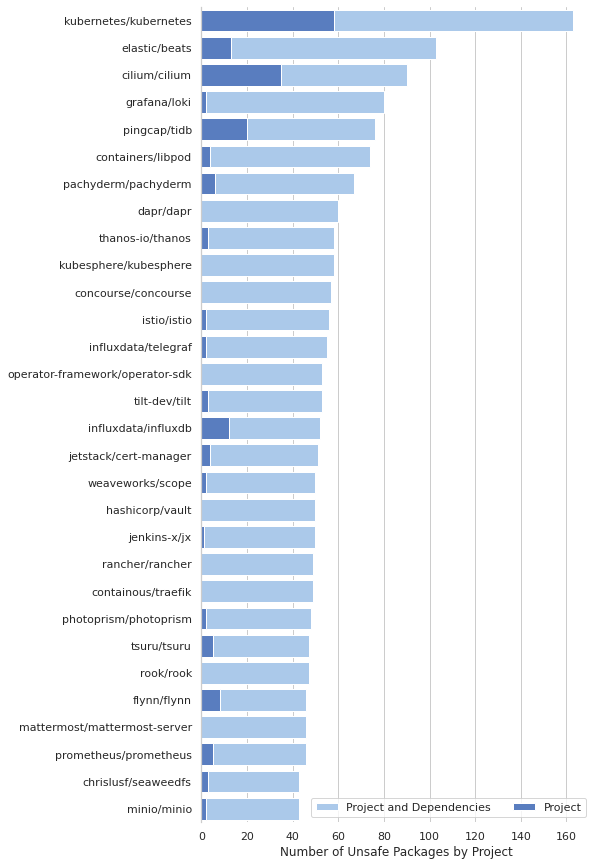

In [1042]:
mdf = pd.merge(packages_df, projects_df, how='left', on='project_name', validate='many_to_one')

df1 = mdf\
    [(mdf['module_path']==mdf['project_root_module'])&(mdf['is_standard']==False)]\
    .groupby('project_name')['package_unsafe_sum']\
    .agg(project_unsafe_pkg_count=lambda x: np.count_nonzero(x))\
    .reset_index()
                
df2 = mdf\
    [(mdf['module_path']!=mdf['project_root_module'])&(mdf['is_standard']==False)]\
    .groupby('project_name')['package_unsafe_sum']\
    .agg(dep_unsafe_pkg_count=lambda x: np.count_nonzero(x))\
    .reset_index()
                 
df = pd.merge(df1, df2, how='left', on='project_name', validate='one_to_one').fillna(0)
df['total_unsafe_pkg_count'] = df.apply(lambda x: x['project_unsafe_pkg_count'] + x['dep_unsafe_pkg_count'], axis=1)

df = df.sort_values(by='total_unsafe_pkg_count', ascending=False)[:30]

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(7, 15))

# Plot the total unsafe package count
sns.set_color_codes("pastel")
sns.barplot(x="total_unsafe_pkg_count", y="project_name", data=df,
            label="Project and Dependencies", color="b")

# Plot the project unsafe packages count
sns.set_color_codes("muted")
sns.barplot(x="project_unsafe_pkg_count", y="project_name", data=df,
            label="Project", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Number of Unsafe Packages by Project")
sns.despine(bottom=True)

Das sagt wohl nicht allzu viel aus. Es ist im Prinzip eine vertikale Version der Heatmap.

### Unsafe packages over import hop count

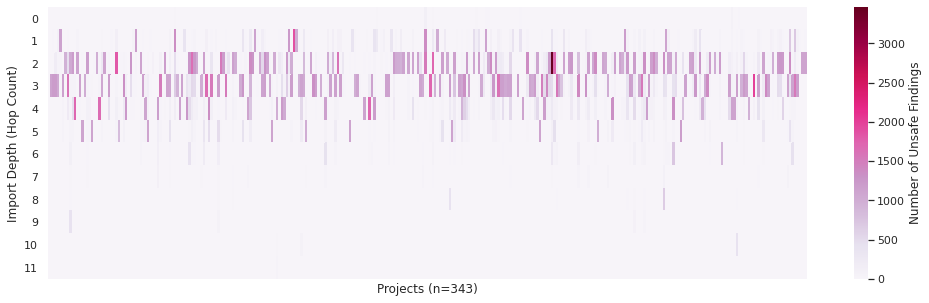

In [1043]:
## Version 1: number of unsafe findings of unsafe packages over hop count

df = packages_df\
    [(packages_df['is_standard']==False)&(packages_df['package_unsafe_sum']>0)]\
    .groupby(['project_name', 'package_hop_count'])['package_unsafe_sum'].sum()\
    .unstack().fillna(0).T

# plot heatmap
fig, ax = plt.subplots(figsize=(17,5))
sns.heatmap(df, ax=ax, cmap='PuRd', cbar_kws={'label': 'Number of Unsafe Findings'})

# y labeling
for item in ax.get_yticklabels():
    item.set_rotation(0)
    
plt.ylabel('Import Depth (Hop Count)')
    
# x labeling
ax.set_xticks([])
plt.xlabel("Projects (n={})".format(packages_df['project_name'].nunique()))
    
plt.show()

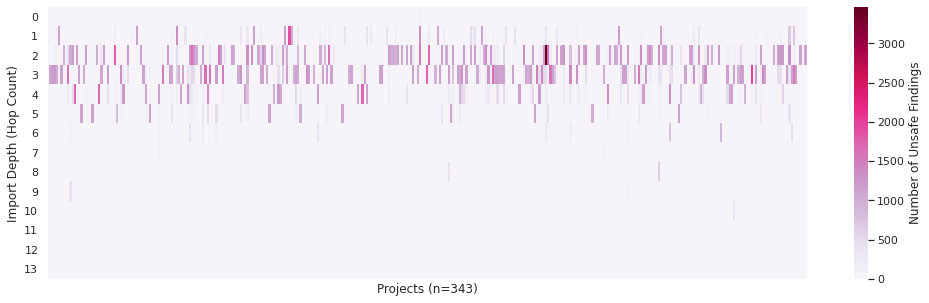

In [1044]:
## Version 2: number of unsafe findings of all packages over hop count

df = packages_df\
    [packages_df['is_standard']==False]\
    .groupby(['project_name', 'package_hop_count'])['package_unsafe_sum'].sum()\
    .unstack().fillna(0).T

# plot heatmap
fig, ax = plt.subplots(figsize=(17,5))
sns.heatmap(df, ax=ax, cmap='PuRd', cbar_kws={'label': 'Number of Unsafe Findings'})

# y labeling
for item in ax.get_yticklabels():
    item.set_rotation(0)
    
plt.ylabel('Import Depth (Hop Count)')
    
# x labeling
ax.set_xticks([])
plt.xlabel("Projects (n={})".format(packages_df['project_name'].nunique()))
    
plt.show()

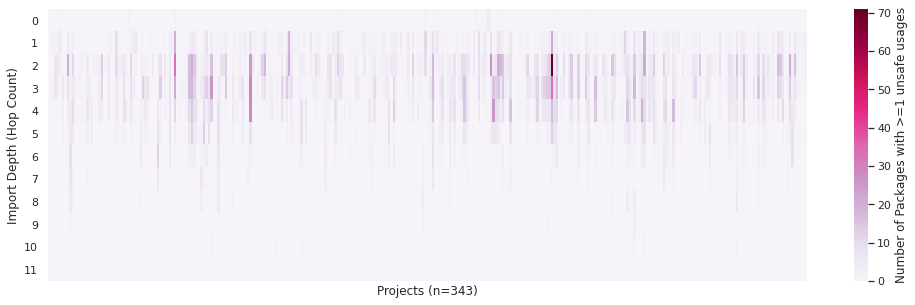

In [1045]:
## Version 3: number of unsafe packages (counting only unsafe packages) over hop count

df = packages_df\
    [(packages_df['is_standard']==False)&(packages_df['package_unsafe_sum']>0)]\
    .groupby(['project_name', 'package_hop_count']).size()\
    .unstack().fillna(0).T

# plot heatmap
fig, ax = plt.subplots(figsize=(17,5))
sns.heatmap(df, ax=ax, cmap='PuRd', cbar_kws={'label': 'Number of Packages with >=1 unsafe usages'})

# y labeling
for item in ax.get_yticklabels():
    item.set_rotation(0)
    
plt.ylabel('Import Depth (Hop Count)')
    
# x labeling
ax.set_xticks([])
plt.xlabel("Projects (n={})".format(packages_df['project_name'].nunique()))
    
plt.show()

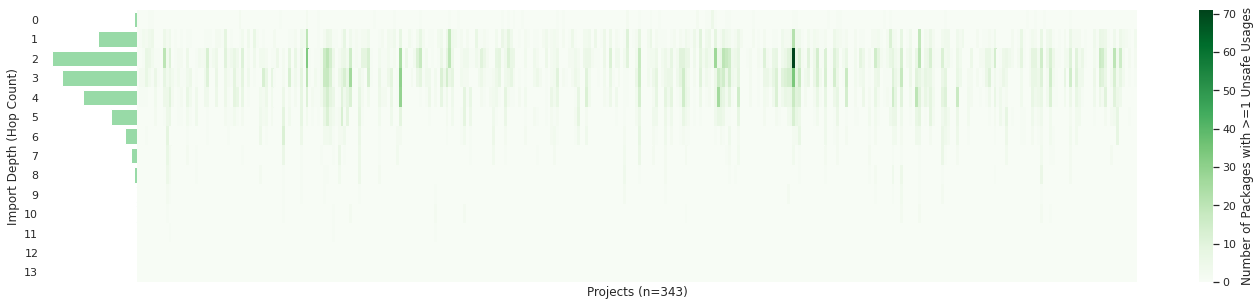

In [1107]:
## Version 4 (preferred): number of unsafe packages (counting all packages) over hop count

df = packages_df\
    [packages_df['is_standard']==False]\
    .groupby(['project_name', 'package_hop_count'])['package_unsafe_sum'].agg(lambda x: np.count_nonzero(x))\
    .unstack().fillna(0).T

distribution_df = packages_df\
    [packages_df['is_standard']==False]\
    .groupby('package_hop_count')['package_unsafe_sum'].agg(lambda x: np.count_nonzero(x))\
    .fillna(0).T

sns.set(style="white")

# create plot setup
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(24, 5), gridspec_kw={'width_ratios': [1, 14]})
fig.subplots_adjust(wspace=0)

# plot heatmap
sns.heatmap(df, ax=axs[1], cmap='Greens', cbar_kws={'label': 'Number of Packages with >=1 Unsafe Usages'})

# plot distribution
sns.set_color_codes("pastel")
sns.barplot(distribution_df.values, distribution_df.index, orient='h', color="g", ax=axs[0])
axs[0].invert_xaxis()

# labeling
for item in axs[1].get_yticklabels():
    item.set_rotation(0)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set(ylabel="", xlabel="Projects (n={})".format(packages_df['project_name'].nunique()))
axs[0].set(ylabel="Import Depth (Hop Count)", xlabel="")
sns.despine(bottom=True, left=True)
axs[0].set_xticks([])

#plt.show()
plt.savefig('/root/data/figures/paper/unsafe-import-depth.png', dpi=600)

Lagemaßzahlen dazu:

In [1104]:
packages_df\
    [(packages_df['is_standard']==False)&(packages_df['package_unsafe_sum']>0)]\
    ['package_hop_count'].describe()

count    5523.000000
mean        3.082021
std         1.620665
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: package_hop_count, dtype: float64

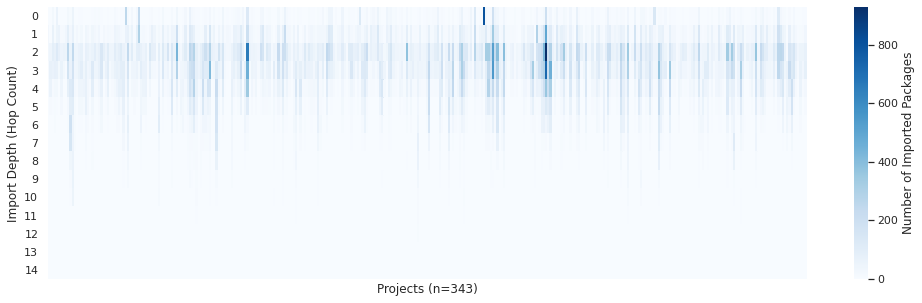

In [1072]:
## import hop count distribution

df = packages_df\
    .groupby(['project_name', 'package_hop_count'])['import_path'].count()\
    .unstack().fillna(0).T

# plot heatmap
fig, ax = plt.subplots(figsize=(17,5))
sns.heatmap(df, ax=ax, cmap='Blues', cbar_kws={'label': 'Number of Imported Packages'})

# y labeling
for item in ax.get_yticklabels():
    item.set_rotation(0)
    
plt.ylabel('Import Depth (Hop Count)')
    
# x labeling
ax.set_xticks([])
plt.xlabel("Projects (n={})".format(packages_df['project_name'].nunique()))
    
plt.show()

### Share by number of packages of unsafe over registries

In [702]:
packages_df\
    .drop_duplicates(subset=['import_path', 'dir', 'module_path', 'module_version']).dropna()\
    .groupby('module_registry')['package_unsafe_sum']\
    .agg(total='count', unsafe=lambda x: np.count_nonzero(x), 
         unsafe_share=lambda x: np.count_nonzero(x)/len(x), one=lambda x: 1)\
    .reset_index()\
    .sort_values(by='unsafe', ascending=False)

,module_registry,total,unsafe,unsafe_share,one
20,github.com,37426,2054,0.054882,1
39,golang.org/x,3363,465,0.138269,1
51,k8s.io,11087,436,0.039325,1
43,google.golang.org,3424,161,0.047021,1
44,gopkg.in,997,52,0.052156,1
...,...,...,...,...,...
37,goftp.io,1,0,0.000000,1
38,gogs.io,55,0,0.000000,1
1,Yearning-go,9,0,0.000000,1
46,gosrc.io,2,0,0.000000,1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


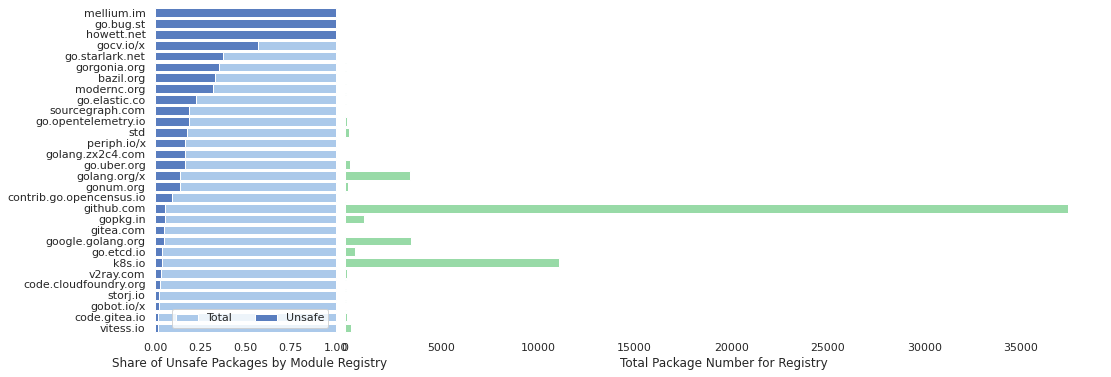

In [802]:
# by far preferred version: combine share and total number of unsafe packages by registry

df = packages_df\
    .drop_duplicates(subset=['import_path', 'dir', 'module_path', 'module_version']).dropna()\
    .groupby('module_registry')['package_unsafe_sum']\
    .agg(total='count', unsafe=lambda x: np.count_nonzero(x), 
         unsafe_share=lambda x: np.count_nonzero(x)/len(x), one=lambda x: 1)\
    .reset_index()\
    .sort_values(by='unsafe_share', ascending=False)[:30]

sns.set(style="white")

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(17, 6), gridspec_kw={'width_ratios': [1, 4]})
fig.subplots_adjust(wspace=0)

# Plot the total package share (1)
sns.set_color_codes("pastel")
sns.barplot(x="one", y="module_registry", data=df,
            label="Total", color="b", ax=axs[0])

# Plot the unsafe packages share
sns.set_color_codes("muted")
sns.barplot(x="unsafe_share", y="module_registry", data=df,
            label="Unsafe", color="b", ax=axs[0])

# Plot the total package count
sns.set_color_codes("pastel")
sns.barplot(x="total", y="module_registry", data=df,
            label="Total", color="g", ax=axs[1])

# Add a legend and informative axis label
axs[0].legend(ncol=2, loc="lower center", frameon=True)
axs[0].set(ylabel="", xlabel="Share of Unsafe Packages by Module Registry")
axs[1].set(ylabel="", xlabel="Total Package Number for Registry")
sns.despine(left=True, bottom=True)

plt.savefig('/root/data/figures/paper/unsafe-packages-by-registry-n30.eps')

In [1108]:
packages_df\
    .drop_duplicates(subset=['import_path', 'dir', 'module_path', 'module_version']).dropna()\
    .groupby(['module_registry', 'module_path'])['package_unsafe_sum'].sum()\
    .groupby('module_registry')\
    .agg(total='count', unsafe=lambda x: np.count_nonzero(x), 
         unsafe_share=lambda x: np.count_nonzero(x)/len(x), one=lambda x: 1)\
    .reset_index()\
    .sort_values(by='unsafe', ascending=False)

,module_registry,total,unsafe,unsafe_share,one
20,github.com,2865,509,0.177661,1
51,k8s.io,54,20,0.370370,1
44,gopkg.in,94,18,0.191489,1
39,golang.org/x,16,8,0.500000,1
56,modernc.org,12,5,0.416667,1
...,...,...,...,...,...
37,goftp.io,1,0,0.000000,1
38,gogs.io,1,0,0.000000,1
1,Yearning-go,1,0,0.000000,1
46,gosrc.io,1,0,0.000000,1


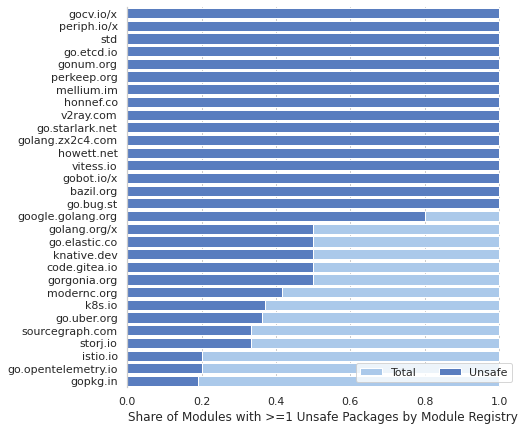

In [1109]:
df = packages_df\
    .drop_duplicates(subset=['import_path', 'dir', 'module_path', 'module_version']).dropna()\
    .groupby(['module_registry', 'module_path'])['package_unsafe_sum'].sum()\
    .groupby('module_registry')\
    .agg(total='count', unsafe=lambda x: np.count_nonzero(x), 
         unsafe_share=lambda x: np.count_nonzero(x)/len(x), one=lambda x: 1)\
    .reset_index()\
    .sort_values(by='unsafe_share', ascending=False)[:30]

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(7, 7))

# Plot the total package sum
sns.set_color_codes("pastel")
sns.barplot(x="one", y="module_registry", data=df,
            label="Total", color="b")

# Plot the unsafe packages sum
sns.set_color_codes("muted")
sns.barplot(x="unsafe_share", y="module_registry", data=df,
            label="Unsafe", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Share of Modules with >=1 Unsafe Packages by Module Registry")
sns.despine(bottom=True)

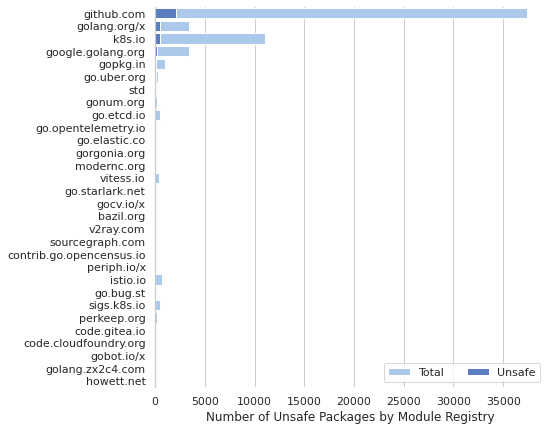

In [1110]:
df = packages_df\
    .drop_duplicates(subset=['import_path', 'dir', 'module_path', 'module_version']).dropna()\
    .groupby('module_registry')['package_unsafe_sum']\
    .agg(total='count', unsafe=lambda x: np.count_nonzero(x), 
         unsafe_share=lambda x: np.count_nonzero(x)/len(x), one=lambda x: 1)\
    .reset_index()\
    .sort_values(by='unsafe', ascending=False)[:30]

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(7, 7))

# Plot the total package sum
sns.set_color_codes("pastel")
sns.barplot(x="total", y="module_registry", data=df,
            label="Total", color="b")

# Plot the unsafe packages sum
sns.set_color_codes("muted")
sns.barplot(x="unsafe", y="module_registry", data=df,
            label="Unsafe", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Number of Unsafe Packages by Module Registry")
sns.despine(bottom=True)

### Distribution of unsafe types

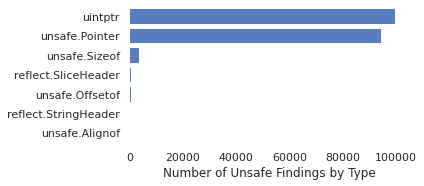

In [1112]:
data = packages_df\
    .drop_duplicates(subset=['import_path', 'dir', 'module_path', 'module_version']).dropna()\
    .loc[:,['package_geiger_unsafe_pointer_sum', 'package_geiger_unsafe_sizeof_sum', 'package_geiger_unsafe_offsetof_sum',
           'package_geiger_unsafe_alignof_sum', 'package_geiger_slice_header_sum', 'package_geiger_string_header_sum',
           'package_geiger_uintptr_sum']]\
    .rename(columns={'package_geiger_unsafe_pointer_sum': 'unsafe.Pointer', 'package_geiger_unsafe_sizeof_sum': 'unsafe.Sizeof',
                    'package_geiger_unsafe_offsetof_sum': 'unsafe.Offsetof', 'package_geiger_unsafe_alignof_sum': 'unsafe.Alignof',
                    'package_geiger_slice_header_sum': 'reflect.SliceHeader', 'package_geiger_string_header_sum': 'reflect.StringHeader',
                    'package_geiger_uintptr_sum': 'uintptr'})\
    .sum()\
    .sort_values(ascending=False)

sns.set(style="white")

fig, ax = plt.subplots(figsize=(5, 2.5))

# Plot the distribution among types
sns.set_color_codes("muted")
g = sns.barplot(data.values, data.index, color="b")

# Add a legend and informative axis label
ax.set(ylabel="", xlabel="Number of Unsafe Findings by Type")
sns.despine(left=True, bottom=True)

plt.savefig('/root/data/figures/paper/distribution-unsafe-types.png', dpi=600)

# Redrawing the in-depth study data set

In [1239]:
# old data set
old_dataset_app_df = pd.read_csv('/root/data/classification/sampled_usages_app.csv')
old_dataset_std_df = pd.read_csv('/root/data/classification/sampled_usages_std.csv')

In [1114]:
old_dataset_app_df['project_name'].unique()

array(['mattermost/mattermost-server', 'rancher/rancher',
       'hashicorp/terraform', 'rook/rook', 'kubernetes/kubernetes',
       'elastic/beats', 'cilium/cilium', 'weaveworks/scope',
       'gorgonia/gorgonia', 'grafana/loki'], dtype=object)

Auswahl der Projekte die zu samplen sind: 10 Projekte mit den meisten unsafe usages ohne Standardlibrary

In [1115]:
packages_df\
    [packages_df['is_standard']==False]\
    .groupby('project_name')['package_unsafe_sum'].sum()\
    .sort_values(ascending=False)\
    .reset_index()[:10]

,project_name,package_unsafe_sum
0,kubernetes/kubernetes,5074
1,elastic/beats,3486
2,gorgonia/gorgonia,3115
3,weaveworks/scope,2896
4,mattermost/mattermost-server,2784
5,rancher/rancher,2737
6,cilium/cilium,2719
7,rook/rook,2656
8,containers/libpod,2576
9,xo/usql,2519


Zu überprüfen ist also, ob alle Samples auch hätten gezogen werden können, wenn diese zehn die Projektgruppe gewesen wäre. Falls das nicht so ist, müssen alle für die es nicht zutrifft gedroppt werden und dann nachgezogen.

In [1154]:
study_projects = ['kubernetes/kubernetes', 'elastic/beats', 'gorgonia/gorgonia', 'weaveworks/scope',
                  'mattermost/mattermost-server', 'rancher/rancher', 'cilium/cilium', 'rook/rook'
                  'containers/libpod', 'xo/usql']

In [945]:
missing_count = 0

for i, row in old_dataset_app_df.iterrows():
    subset_df = geiger_df\
        [(geiger_df['line_number']==row.line_number)&
         (geiger_df['file_name']==row.file_name)&(geiger_df['match_type']==row.match_type)&
         (geiger_df['package_import_path']==row.package_import_path)&(geiger_df['module_path']==row.module_path)&
         (geiger_df['module_version']==row.module_version)]
    
    if subset_df['text'].count() < 1:
        missing_count += 1
        print("not found: column={}, line={}, file={}, type={}, pkg={}, mod={}, v={}".format(
            row.column, row.line_number, row.file_name, row.match_type, row.package_import_path, row.module_path, row.module_version))

not found: column=26.0, line=529.0, file=helper_unsafe.go, type=unsafe.Pointer, pkg=github.com/ugorji/go/codec, mod=github.com/ugorji/go, v=v0.0.0-20180813092308-00b869d2f4a5
not found: column=30.0, line=315.0, file=zz_generated.conversion.go, type=unsafe.Pointer, pkg=k8s.io/apiserver/pkg/apis/audit/v1, mod=k8s.io/apiserver, v=v0.0.0
not found: column=21.0, line=1237.0, file=zz_generated.conversion.go, type=unsafe.Pointer, pkg=k8s.io/apiextensions-apiserver/pkg/apis/apiextensions/v1, mod=k8s.io/apiextensions-apiserver, v=v0.0.0
not found: column=30.0, line=741.0, file=zz_generated.conversion.go, type=unsafe.Pointer, pkg=k8s.io/apiextensions-apiserver/pkg/apis/apiextensions/v1, mod=k8s.io/apiextensions-apiserver, v=v0.0.0
not found: column=72.0, line=549.0, file=zz_generated.conversion.go, type=unsafe.Pointer, pkg=k8s.io/apiextensions-apiserver/pkg/apis/apiextensions/v1beta1, mod=k8s.io/apiextensions-apiserver, v=v0.0.0
not found: column=37.0, line=227.0, file=zz_generated.conversion.go

KeyboardInterrupt: 

In [1155]:
geiger_df[(geiger_df['package_import_path']=='k8s.io/apiserver/pkg/apis/audit/v1')&(geiger_df['module_path']=='k8s.io/apiserver')&
         (geiger_df['file_name']=='zz_generated.conversion.go')&
         (geiger_df['line_number']==315.0)]

,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,package_dir,module_path,module_version,project_name
270300,out.OmitStages = *(*[]Stage)(unsafe.Pointer(&i...,\tout.UserGroups = *(*[]string)(unsafe.Pointer...,315,31,14337,unsafe.Pointer,assignment,zz_generated.conversion.go,322,14652,k8s.io/apiserver/pkg/apis/audit/v1,/root/go/pkg/mod/k8s.io/apiserver@v0.18.0/pkg/...,k8s.io/apiserver,v0.18.0,rancher/rancher
675068,out.OmitStages = *(*[]Stage)(unsafe.Pointer(&i...,\tout.UserGroups = *(*[]string)(unsafe.Pointer...,315,31,14337,unsafe.Pointer,assignment,zz_generated.conversion.go,322,14652,k8s.io/apiserver/pkg/apis/audit/v1,/root/go/pkg/mod/k8s.io/apiserver@v0.17.2/pkg/...,k8s.io/apiserver,v0.17.2,rook/rook
902825,out.OmitStages = *(*[]Stage)(unsafe.Pointer(&i...,\tout.UserGroups = *(*[]string)(unsafe.Pointer...,315,31,14337,unsafe.Pointer,assignment,zz_generated.conversion.go,322,14652,k8s.io/apiserver/pkg/apis/audit/v1,/root/go/pkg/mod/k8s.io/apiserver@v0.18.0/pkg/...,k8s.io/apiserver,v0.18.0,jetstack/cert-manager
1757814,out.OmitStages = *(*[]Stage)(unsafe.Pointer(&i...,\tout.UserGroups = *(*[]string)(unsafe.Pointer...,315,31,14337,unsafe.Pointer,assignment,zz_generated.conversion.go,322,14652,k8s.io/apiserver/pkg/apis/audit/v1,/root/go/pkg/mod/k8s.io/apiserver@v0.17.3/pkg/...,k8s.io/apiserver,v0.17.3,kubesphere/kubesphere


### App Data Set nachziehen

In [1240]:
mdf = pd.merge(old_dataset_app_df, geiger_df, how='left',
               on=['package_import_path', 'module_path', 'module_version', 'match_type', 'file_name',
                   'line_number'])\
    .dropna()

mdf

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,text_x,context_x,line_number,column_x,...,label2,text_y,context_y,column_y,absolute_offset_y,context_type,file_loc_y,file_byte_size_y,package_dir,project_name_y
0,0,0,0,0,0,0,\tnameBuf := (*[unsafe.Sizeof(dirent.Name)]byt...,"\t\t// symlinks, and directories.\n\t\treturn\...",116.0,48.0,...,efficiency,nameBuf := (*[unsafe.Sizeof(dirent.Name)]byte)...,\t\t// of goimports. goimports only cares abou...,49.0,3169.0,assignment,128.0,3466.0,/root/download/mattermost/mattermost-server/ve...,mattermost/mattermost-server
1,1,1,1,1,1,1,\tout.PostStart = (*core.Handler)(unsafe.Point...,\treturn autoConvert_core_KeyToPath_To_v1_KeyT...,4080.0,33.0,...,efficiency,out.PostStart = (*core.Handler)(unsafe.Pointer...,func Convert_core_KeyToPath_To_v1_KeyToPath(in...,34.0,232421.0,assignment,8109.0,431398.0,/root/go/pkg/mod/k8s.io/kubernetes@v1.18.0/pkg...,rancher/rancher
2,2,2,2,2,2,2,func (codec *uint32Codec) IsEmpty(ptr unsafe.P...,func (codec *uint32Codec) Encode(ptr unsafe.Po...,336.0,38.0,...,generics,func (codec *uint32Codec) IsEmpty(ptr unsafe.P...,\nfunc (codec *uint32Codec) Encode(ptr unsafe....,39.0,8463.0,parameter,451.0,11107.0,/root/download/hashicorp/terraform/vendor/gith...,hashicorp/terraform
3,2,2,2,2,2,2,func (codec *uint32Codec) IsEmpty(ptr unsafe.P...,func (codec *uint32Codec) Encode(ptr unsafe.Po...,336.0,38.0,...,generics,func (codec *uint32Codec) IsEmpty(ptr unsafe.P...,\nfunc (codec *uint32Codec) Encode(ptr unsafe....,39.0,8463.0,parameter,451.0,11107.0,/root/go/pkg/mod/github.com/json-iterator/go@v...,drone/drone
4,2,2,2,2,2,2,func (codec *uint32Codec) IsEmpty(ptr unsafe.P...,func (codec *uint32Codec) Encode(ptr unsafe.Po...,336.0,38.0,...,generics,func (codec *uint32Codec) IsEmpty(ptr unsafe.P...,\nfunc (codec *uint32Codec) Encode(ptr unsafe....,39.0,8463.0,parameter,451.0,11107.0,/root/go/pkg/mod/github.com/json-iterator/go@v...,kubeless/kubeless
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,995,995,995,995,995,995,"\tinitState func(ctx *unfoldCtx, sp unsafe.Poi...",}\n\ntype fieldUnfolder struct {\n\toffset ...,42.0,35.0,...,generics,"initState func(ctx *unfoldCtx, sp unsafe.Pointer)",\tunfolderErrObjectStart\n}\n\ntype fieldUnfol...,36.0,1166.0,parameter,197.0,4804.0,/root/go/pkg/mod/github.com/elastic/go-structf...,elastic/beats
7521,996,996,996,996,996,996,\t\t\tretVal[i][j] = *(*[]string)(unsafe.Point...,\t\t\t\tData: uintptr(unsafe.Pointer(&data[sta...,1148.0,31.0,...,efficiency,retVal[i][j] = *(*[]string)(unsafe.Pointer(hdr)),\t\t\thdr := &reflect.SliceHeader{\n\t\t\t\tDa...,32.0,29698.0,assignment,1152.0,29736.0,/root/go/pkg/mod/gorgonia.org/tensor@v0.9.6/na...,gorgonia/gorgonia
7522,997,997,997,997,997,997,"\t\t\tretVal = append(retVal, *(*[]float32)(un...",\t\t\t\tData: uintptr(unsafe.Pointer(&data[i])...,476.0,41.0,...,efficiency,"retVal = append(retVal, *(*[]float32)(unsafe.P...",\t\t\thdr := &reflect.SliceHeader{\n\t\t\t\tDa...,42.0,10980.0,assignment,635.0,14599.0,/root/go/pkg/mod/gorgonia.org/tensor@v0.9.6/na...,gorgonia/gorgonia
7523,998,998,998,998,998,998,\tout.Capacity = *(*core.ResourceList)(unsafe....,\treturn autoConvert_core_PersistentVolumeSour...,5277.0,38.0,...,efficiency,out.Capacity = *(*core.ResourceList)(unsafe.Po...,func Convert_core_PersistentVolumeSource_To_v1...,39.0,293168.0,assignment,8119.0,431912.0,/root/go/pkg/mod/k8s.io/kubernetes@v1.17.2/pkg...,rook/rook


In [1241]:
dropped_old_app_df = mdf.where(mdf['project_name_y'].isin(study_projects)).dropna()\
        .drop_duplicates(subset=['package_import_path', 'module_path', 'module_version', 'match_type', 'file_name',
                            'line_number'], keep='first')

dropped_old_app_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,text_x,context_x,line_number,column_x,...,label2,text_y,context_y,column_y,absolute_offset_y,context_type,file_loc_y,file_byte_size_y,package_dir,project_name_y
0,0.0,0.0,0.0,0.0,0.0,0.0,\tnameBuf := (*[unsafe.Sizeof(dirent.Name)]byt...,"\t\t// symlinks, and directories.\n\t\treturn\...",116.0,48.0,...,efficiency,nameBuf := (*[unsafe.Sizeof(dirent.Name)]byte)...,\t\t// of goimports. goimports only cares abou...,49.0,3169.0,assignment,128.0,3466.0,/root/download/mattermost/mattermost-server/ve...,mattermost/mattermost-server
1,1.0,1.0,1.0,1.0,1.0,1.0,\tout.PostStart = (*core.Handler)(unsafe.Point...,\treturn autoConvert_core_KeyToPath_To_v1_KeyT...,4080.0,33.0,...,efficiency,out.PostStart = (*core.Handler)(unsafe.Pointer...,func Convert_core_KeyToPath_To_v1_KeyToPath(in...,34.0,232421.0,assignment,8109.0,431398.0,/root/go/pkg/mod/k8s.io/kubernetes@v1.18.0/pkg...,rancher/rancher
16,3.0,3.0,3.0,3.0,3.0,3.0,\t\tuintptr(unsafe.Pointer(&y[0])) <= uintptr(...,// corresponding) index. The memory beyond the...,18.0,10.0,...,layout-control,uintptr(unsafe.Pointer(&y[0])) <= uintptr(unsa...,// AnyOverlap reports whether x and y share me...,11.0,701.0,assignment,32.0,1262.0,/root/go/pkg/mod/golang.org/x/crypto@v0.0.0-20...,elastic/beats
32,4.0,4.0,4.0,4.0,4.0,4.0,\tout.Waiting = (*core.ContainerStateWaiting)(...,\treturn autoConvert_core_ContainerPort_To_v1_...,2946.0,45.0,...,efficiency,out.Waiting = (*core.ContainerStateWaiting)(un...,func Convert_core_ContainerPort_To_v1_Containe...,46.0,175875.0,assignment,8119.0,431912.0,/root/go/pkg/mod/k8s.io/kubernetes@v1.17.2/pkg...,rook/rook
37,6.0,6.0,6.0,6.0,6.0,6.0,\ta := (*unix.RtAttr)(unsafe.Pointer(&b[0]))\n,"\treturn attrs, nil\n}\n\nfunc netlinkRouteAtt...",741.0,21.0,...,serialization,a := (*unix.RtAttr)(unsafe.Pointer(&b[0])),"\t}\n\treturn attrs, nil\n}\n\nfunc netlinkRou...",22.0,18091.0,assignment,760.0,18574.0,/root/go/pkg/mod/github.com/vishvananda/netlin...,kubernetes/kubernetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,995.0,995.0,995.0,995.0,995.0,995.0,"\tinitState func(ctx *unfoldCtx, sp unsafe.Poi...",}\n\ntype fieldUnfolder struct {\n\toffset ...,42.0,35.0,...,generics,"initState func(ctx *unfoldCtx, sp unsafe.Pointer)",\tunfolderErrObjectStart\n}\n\ntype fieldUnfol...,36.0,1166.0,parameter,197.0,4804.0,/root/go/pkg/mod/github.com/elastic/go-structf...,elastic/beats
7521,996.0,996.0,996.0,996.0,996.0,996.0,\t\t\tretVal[i][j] = *(*[]string)(unsafe.Point...,\t\t\t\tData: uintptr(unsafe.Pointer(&data[sta...,1148.0,31.0,...,efficiency,retVal[i][j] = *(*[]string)(unsafe.Pointer(hdr)),\t\t\thdr := &reflect.SliceHeader{\n\t\t\t\tDa...,32.0,29698.0,assignment,1152.0,29736.0,/root/go/pkg/mod/gorgonia.org/tensor@v0.9.6/na...,gorgonia/gorgonia
7522,997.0,997.0,997.0,997.0,997.0,997.0,"\t\t\tretVal = append(retVal, *(*[]float32)(un...",\t\t\t\tData: uintptr(unsafe.Pointer(&data[i])...,476.0,41.0,...,efficiency,"retVal = append(retVal, *(*[]float32)(unsafe.P...",\t\t\thdr := &reflect.SliceHeader{\n\t\t\t\tDa...,42.0,10980.0,assignment,635.0,14599.0,/root/go/pkg/mod/gorgonia.org/tensor@v0.9.6/na...,gorgonia/gorgonia
7523,998.0,998.0,998.0,998.0,998.0,998.0,\tout.Capacity = *(*core.ResourceList)(unsafe....,\treturn autoConvert_core_PersistentVolumeSour...,5277.0,38.0,...,efficiency,out.Capacity = *(*core.ResourceList)(unsafe.Po...,func Convert_core_PersistentVolumeSource_To_v1...,39.0,293168.0,assignment,8119.0,431912.0,/root/go/pkg/mod/k8s.io/kubernetes@v1.17.2/pkg...,rook/rook


In [1242]:
new_dataset_app_before_redraw_df = dropped_old_app_df\
    .loc[:,['text_y', 'context_y', 'line_number', 'column_y', 'absolute_offset_y', 'match_type', 
            'context_type', 'file_name', 'file_loc_y', 'file_byte_size_y', 'package_import_path', 
            'module_path', 'module_version', 'project_name_y', 'label', 'label2']]\
    .rename(columns={'text_y': 'text', 'context_y': 'context', 'column_y': 'column', 
                     'absolute_offset_y': 'absolute_offset', 'file_loc_y': 'file_loc',
                     'file_byte_size_y': 'file_byte_size', 'project_name_y': 'project_name'})\
    .drop_duplicates(subset=['module_path', 'module_version', 'package_import_path', 'file_name', 'line_number']).dropna()

new_dataset_app_before_redraw_df

,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,label,label2
0,nameBuf := (*[unsafe.Sizeof(dirent.Name)]byte)...,\t\t// of goimports. goimports only cares abou...,116.0,49.0,3169.0,unsafe.Pointer,assignment,fastwalk_unix.go,128.0,3466.0,golang.org/x/tools/internal/fastwalk,golang.org/x/tools,v0.0.0-20200428021058-7ae4988eb4d9,mattermost/mattermost-server,conversion-struct-bytes,efficiency
1,out.PostStart = (*core.Handler)(unsafe.Pointer...,func Convert_core_KeyToPath_To_v1_KeyToPath(in...,4080.0,34.0,232421.0,unsafe.Pointer,assignment,zz_generated.conversion.go,8109.0,431398.0,k8s.io/kubernetes/pkg/apis/core/v1,k8s.io/kubernetes,v1.18.0,rancher/rancher,conversion-struct-struct,efficiency
16,uintptr(unsafe.Pointer(&y[0])) <= uintptr(unsa...,// AnyOverlap reports whether x and y share me...,18.0,11.0,701.0,unsafe.Pointer,assignment,aliasing.go,32.0,1262.0,golang.org/x/crypto/internal/subtle,golang.org/x/crypto,v0.0.0-20200510223506-06a226fb4e37,elastic/beats,pointer-arithmetic-memory-layout,layout-control
32,out.Waiting = (*core.ContainerStateWaiting)(un...,func Convert_core_ContainerPort_To_v1_Containe...,2946.0,46.0,175875.0,unsafe.Pointer,assignment,zz_generated.conversion.go,8119.0,431912.0,k8s.io/kubernetes/pkg/apis/core/v1,k8s.io/kubernetes,v1.17.2,rook/rook,conversion-struct-struct,efficiency
37,a := (*unix.RtAttr)(unsafe.Pointer(&b[0])),"\t}\n\treturn attrs, nil\n}\n\nfunc netlinkRou...",741.0,22.0,18091.0,unsafe.Pointer,assignment,nl_linux.go,760.0,18574.0,github.com/vishvananda/netlink/nl,github.com/vishvananda/netlink,v1.1.0,kubernetes/kubernetes,conversion-struct-bytes,serialization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,"initState func(ctx *unfoldCtx, sp unsafe.Pointer)",\tunfolderErrObjectStart\n}\n\ntype fieldUnfol...,42.0,36.0,1166.0,unsafe.Pointer,parameter,unfold_struct.go,197.0,4804.0,github.com/elastic/go-structform/gotype,github.com/elastic/go-structform,v0.0.6,elastic/beats,data-structure,generics
7521,retVal[i][j] = *(*[]string)(unsafe.Pointer(hdr)),\t\t\thdr := &reflect.SliceHeader{\n\t\t\t\tDa...,1148.0,32.0,29698.0,unsafe.Pointer,assignment,iterator_native.go,1152.0,29736.0,gorgonia.org/tensor/native,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,conversion-header,efficiency
7522,"retVal = append(retVal, *(*[]float32)(unsafe.P...",\t\t\thdr := &reflect.SliceHeader{\n\t\t\t\tDa...,476.0,42.0,10980.0,unsafe.Pointer,assignment,iterator_native2.go,635.0,14599.0,gorgonia.org/tensor/native,gorgonia.org/tensor,v0.9.6,gorgonia/gorgonia,conversion-header,efficiency
7523,out.Capacity = *(*core.ResourceList)(unsafe.Po...,func Convert_core_PersistentVolumeSource_To_v1...,5277.0,39.0,293168.0,unsafe.Pointer,assignment,zz_generated.conversion.go,8119.0,431912.0,k8s.io/kubernetes/pkg/apis/core/v1,k8s.io/kubernetes,v1.17.2,rook/rook,conversion-struct-struct,efficiency


In [1243]:
missing_projects = new_dataset_app_before_redraw_df['project_name'].unique()

extra_app_base = geiger_df\
    [(geiger_df['module_path']!='std')&(geiger_df['module_path']!='golang.org/x/sys')&
     (geiger_df['project_name'].isin(study_projects))&(geiger_df['match_type']=='unsafe.Pointer')]\
    .loc[:,['text', 'context', 'line_number', 'column', 'absolute_offset', 'match_type', 
            'context_type', 'file_name', 'file_loc', 'file_byte_size', 'package_import_path', 
            'module_path', 'module_version', 'project_name']]\
    .drop_duplicates(subset=['module_path', 'module_version', 'package_import_path', 'file_name', 'line_number']).dropna()

extra_app = pd.concat([new_dataset_app_before_redraw_df.reset_index().iloc[:,1:-2], extra_app_base.reset_index().iloc[:,1:]])\
    .drop_duplicates(subset=['module_path', 'module_version', 'package_import_path', 'file_name', 'line_number'], keep=False).dropna()\
    .sample(n=191, random_state=100)

extra_app['label'] = 'unclassified'
extra_app['label2'] = 'unclassified'

new_dataset_app_df = pd.concat([new_dataset_app_before_redraw_df, extra_app])\
    .drop_duplicates(subset=['module_path', 'module_version', 'package_import_path', 'file_name', 'line_number']).dropna()

new_dataset_app_df
#extra_app_base.reset_index().iloc[:,1:]

,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,label,label2
0,nameBuf := (*[unsafe.Sizeof(dirent.Name)]byte)...,\t\t// of goimports. goimports only cares abou...,116.0,49.0,3169.0,unsafe.Pointer,assignment,fastwalk_unix.go,128.0,3466.0,golang.org/x/tools/internal/fastwalk,golang.org/x/tools,v0.0.0-20200428021058-7ae4988eb4d9,mattermost/mattermost-server,conversion-struct-bytes,efficiency
1,out.PostStart = (*core.Handler)(unsafe.Pointer...,func Convert_core_KeyToPath_To_v1_KeyToPath(in...,4080.0,34.0,232421.0,unsafe.Pointer,assignment,zz_generated.conversion.go,8109.0,431398.0,k8s.io/kubernetes/pkg/apis/core/v1,k8s.io/kubernetes,v1.18.0,rancher/rancher,conversion-struct-struct,efficiency
16,uintptr(unsafe.Pointer(&y[0])) <= uintptr(unsa...,// AnyOverlap reports whether x and y share me...,18.0,11.0,701.0,unsafe.Pointer,assignment,aliasing.go,32.0,1262.0,golang.org/x/crypto/internal/subtle,golang.org/x/crypto,v0.0.0-20200510223506-06a226fb4e37,elastic/beats,pointer-arithmetic-memory-layout,layout-control
32,out.Waiting = (*core.ContainerStateWaiting)(un...,func Convert_core_ContainerPort_To_v1_Containe...,2946.0,46.0,175875.0,unsafe.Pointer,assignment,zz_generated.conversion.go,8119.0,431912.0,k8s.io/kubernetes/pkg/apis/core/v1,k8s.io/kubernetes,v1.17.2,rook/rook,conversion-struct-struct,efficiency
37,a := (*unix.RtAttr)(unsafe.Pointer(&b[0])),"\t}\n\treturn attrs, nil\n}\n\nfunc netlinkRou...",741.0,22.0,18091.0,unsafe.Pointer,assignment,nl_linux.go,760.0,18574.0,github.com/vishvananda/netlink/nl,github.com/vishvananda/netlink,v1.1.0,kubernetes/kubernetes,conversion-struct-bytes,serialization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8338,var _cgo_9599666909ac_Cfunc_deallocate_semapho...,\treturn\n}\n//go:cgo_import_static _cgo_95996...,166.0,52.0,5361.0,unsafe.Pointer,variable,/root/.cache/go-build/48/48c5a43960c863b51382d...,0.0,0.0,github.com/containers/libpod/libpod/lock/shm,github.com/containers/libpod,project,containers/libpod,unclassified,unclassified
1502,out.Conditions = *(*[]apps.DeploymentCondition...,\tout.Replicas = in.Replicas\n\tout.UpdatedRep...,1075.0,50.0,61568.0,unsafe.Pointer,assignment,zz_generated.conversion.go,2299.0,123915.0,k8s.io/kubernetes/pkg/apis/extensions/v1beta1,k8s.io/kubernetes,project,kubernetes/kubernetes,unclassified,unclassified
6591,out.Cinder = (*core.CinderVolumeSource)(unsafe...,\tout.ISCSI = (*core.ISCSIVolumeSource)(unsafe...,7968.0,42.0,422800.0,unsafe.Pointer,assignment,zz_generated.conversion.go,8119.0,431912.0,k8s.io/kubernetes/pkg/apis/core/v1,k8s.io/kubernetes,v1.17.2,rook/rook,unclassified,unclassified
7529,var _cgo_6cd21b101e7b_Cfunc_dpiStmt_addRef = u...,\treturn\n}\n//go:cgo_import_static _cgo_6cd21...,4128.0,46.0,146454.0,unsafe.Pointer,variable,/root/.cache/go-build/3e/3eb68e40305fe81ca0dee...,0.0,0.0,github.com/godror/godror,github.com/godror/godror,v0.16.0,xo/usql,unclassified,unclassified


In [1245]:
#new_dataset_app_df.to_csv('/root/data/classification/sampled_usages_app_new.csv')

### Std Data Set nachziehen

In [1246]:
mdf = pd.merge(old_dataset_std_df, geiger_df, how='left',
               on=['package_import_path', 'module_path', 'module_version', 'match_type', 'file_name',
                   'line_number'])\
    .dropna()

mdf

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,text_x,context_x,line_number,...,label2,text_y,context_y,column_y,absolute_offset_y,context_type,file_loc_y,file_byte_size_y,package_dir,project_name_y
0,0,0,0,0,0,0,0,"func setsockopt(s int, level int, name int, va...",}\n\n// THIS FILE IS GENERATED BY THE COMMAND ...,1520.0,...,no-gc,"func setsockopt(s int, level int, name int, va...",\treturn\n}\n\n// THIS FILE IS GENERATED BY TH...,49.0,36321.0,parameter,1715.0,41639.0,/usr/local/go/src/syscall,kubernetes/kubernetes
1,0,0,0,0,0,0,0,"func setsockopt(s int, level int, name int, va...",}\n\n// THIS FILE IS GENERATED BY THE COMMAND ...,1520.0,...,no-gc,"func setsockopt(s int, level int, name int, va...",\treturn\n}\n\n// THIS FILE IS GENERATED BY TH...,49.0,36321.0,parameter,1715.0,41639.0,/usr/local/go/src/syscall,gohugoio/hugo
2,0,0,0,0,0,0,0,"func setsockopt(s int, level int, name int, va...",}\n\n// THIS FILE IS GENERATED BY THE COMMAND ...,1520.0,...,no-gc,"func setsockopt(s int, level int, name int, va...",\treturn\n}\n\n// THIS FILE IS GENERATED BY TH...,49.0,36321.0,parameter,1715.0,41639.0,/usr/local/go/src/syscall,gin-gonic/gin
3,0,0,0,0,0,0,0,"func setsockopt(s int, level int, name int, va...",}\n\n// THIS FILE IS GENERATED BY THE COMMAND ...,1520.0,...,no-gc,"func setsockopt(s int, level int, name int, va...",\treturn\n}\n\n// THIS FILE IS GENERATED BY TH...,49.0,36321.0,parameter,1715.0,41639.0,/usr/local/go/src/syscall,fatedier/frp
4,0,0,0,0,0,0,0,"func setsockopt(s int, level int, name int, va...",}\n\n// THIS FILE IS GENERATED BY THE COMMAND ...,1520.0,...,no-gc,"func setsockopt(s int, level int, name int, va...",\treturn\n}\n\n// THIS FILE IS GENERATED BY TH...,49.0,36321.0,parameter,1715.0,41639.0,/usr/local/go/src/syscall,gogs/gogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65868,397,397,397,397,397,397,397,"func sigtramp(sig uint32, info *siginfo, ctx u...",//#define sa_handler k_sa_handler\n//#endif\n\...,370.0,...,inevitable,"func sigtramp(sig uint32, info *siginfo, ctx u...",//#ifdef GOARCH_386\n//#define sa_handler k_sa...,46.0,10040.0,parameter,500.0,13478.0,/usr/local/go/src/runtime,disintegration/imaging
65869,397,397,397,397,397,397,397,"func sigtramp(sig uint32, info *siginfo, ctx u...",//#define sa_handler k_sa_handler\n//#endif\n\...,370.0,...,inevitable,"func sigtramp(sig uint32, info *siginfo, ctx u...",//#ifdef GOARCH_386\n//#define sa_handler k_sa...,46.0,10040.0,parameter,500.0,13478.0,/usr/local/go/src/runtime,gogf/gf
65870,397,397,397,397,397,397,397,"func sigtramp(sig uint32, info *siginfo, ctx u...",//#define sa_handler k_sa_handler\n//#endif\n\...,370.0,...,inevitable,"func sigtramp(sig uint32, info *siginfo, ctx u...",//#ifdef GOARCH_386\n//#define sa_handler k_sa...,46.0,10040.0,parameter,500.0,13478.0,/usr/local/go/src/runtime,googleforgames/agones
65871,397,397,397,397,397,397,397,"func sigtramp(sig uint32, info *siginfo, ctx u...",//#define sa_handler k_sa_handler\n//#endif\n\...,370.0,...,inevitable,"func sigtramp(sig uint32, info *siginfo, ctx u...",//#ifdef GOARCH_386\n//#define sa_handler k_sa...,46.0,10040.0,parameter,500.0,13478.0,/usr/local/go/src/runtime,kubernetes-sigs/external-dns


In [1247]:
dropped_old_std_df = mdf.where(mdf['project_name_y'].isin(study_projects)).dropna()\
        .drop_duplicates(subset=['package_import_path', 'module_path', 'module_version', 'match_type', 'file_name',
                            'line_number'], keep='first')

dropped_old_std_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,text_x,context_x,line_number,...,label2,text_y,context_y,column_y,absolute_offset_y,context_type,file_loc_y,file_byte_size_y,package_dir,project_name_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"func setsockopt(s int, level int, name int, va...",}\n\n// THIS FILE IS GENERATED BY THE COMMAND ...,1520.0,...,no-gc,"func setsockopt(s int, level int, name int, va...",\treturn\n}\n\n// THIS FILE IS GENERATED BY TH...,49.0,36321.0,parameter,1715.0,41639.0,/usr/local/go/src/syscall,kubernetes/kubernetes
343,1.0,1.0,1.0,1.0,1.0,1.0,1.0,func (sa *SockaddrInet6) sockaddr() (unsafe.Po...,"\t}\n\treturn unsafe.Pointer(&sa.raw), SizeofS...",358.0,...,layout-control,func (sa *SockaddrInet6) sockaddr() (unsafe.Po...,\t\tsa.raw.Addr[i] = sa.Addr[i]\n\t}\n\treturn...,38.0,8701.0,parameter,997.0,26679.0,/usr/local/go/src/syscall,kubernetes/kubernetes
686,2.0,2.0,2.0,2.0,2.0,2.0,2.0,\t\t\tk := *((*unsafe.Pointer)(add(unsafe.Poin...,\t\t\t\t\tbreak bucketloop\n\t\t\t\t}\n\t\t\t\...,226.0,...,efficiency,k := *((*unsafe.Pointer)(add(unsafe.Pointer(b)...,\t\t\t\tif b.tophash[i] == emptyRest {\n\t\t\t...,13.0,5984.0,assignment,458.0,12663.0,/usr/local/go/src/runtime,kubernetes/kubernetes
1372,3.0,3.0,3.0,3.0,3.0,3.0,3.0,"\t_, _, e1 := Syscall(SYS_UNLINKAT, uintptr(di...","\t_p0, err = BytePtrFromString(path)\n\tif err...",145.0,...,no-gc,"_, _, e1 := Syscall(SYS_UNLINKAT, uintptr(dirf...","\tvar _p0 *byte\n\t_p0, err = BytePtrFromStrin...",60.0,3571.0,assignment,1856.0,45337.0,/root/download/mattermost/mattermost-server/ve...,mattermost/mattermost-server
1388,5.0,5.0,5.0,5.0,5.0,5.0,5.0,\t\t_p1 = unsafe.Pointer(&_zero)\n,\tvar _p1 unsafe.Pointer\n\tif len(dest) > 0 {...,659.0,...,no-gc,_p1 = unsafe.Pointer(&_zero),\t}\n\tvar _p1 unsafe.Pointer\n\tif len(dest) ...,9.0,16418.0,assignment,1825.0,44421.0,/root/download/cilium/cilium/vendor/golang.org...,cilium/cilium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64494,393.0,393.0,393.0,393.0,393.0,393.0,393.0,\t\treturn &(*u)(unsafe.Pointer(t)).u\n,\t\ttype u struct {\n\t\t\t_type\n\t\t\tu unco...,116.0,...,types,return &(*u)(unsafe.Pointer(t)).u,\tdefault:\n\t\ttype u struct {\n\t\t\t_type\n...,16.0,2703.0,assignment,726.0,18709.0,/usr/local/go/src/runtime,kubernetes/kubernetes
64837,394.0,394.0,394.0,394.0,394.0,394.0,394.0,"func connect(s int, addr unsafe.Pointer, addrl...",}\n\n// THIS FILE IS GENERATED BY THE COMMAND ...,510.0,...,no-gc,"func connect(s int, addr unsafe.Pointer, addrl...",\treturn\n}\n\n// THIS FILE IS GENERATED BY TH...,26.0,12620.0,parameter,745.0,19148.0,/root/download/mattermost/mattermost-server/ve...,mattermost/mattermost-server
64844,395.0,395.0,395.0,395.0,395.0,395.0,395.0,func (a *traceAlloc) alloc(n uintptr) unsafe.P...,func (p traceAllocBlockPtr) ptr() *traceAllocB...,924.0,...,memory,func (a *traceAlloc) alloc(n uintptr) unsafe.P...,\nfunc (p traceAllocBlockPtr) ptr() *traceAllo...,39.0,30820.0,parameter,1214.0,38634.0,/usr/local/go/src/runtime,kubernetes/kubernetes
65187,396.0,396.0,396.0,396.0,396.0,396.0,396.0,\t\tts.tls = (*uint64)(unsafe.Pointer(&mp.tls[...,\t\tif _cgo_thread_start == nil {\n\t\t\tthrow...,1742.0,...,cgo,ts.tls = (*uint64)(unsafe.Pointer(&mp.tls[0])),\t\tvar ts cgothreadstart\n\t\tif _cgo_thread_...,22.0,51833.0,assignment,5418.0,153166.0,/usr/local/go/src/runtime,kubernetes/kubernetes


In [1249]:
new_dataset_std_before_redraw_df = dropped_old_std_df\
    .loc[:,['text_y', 'context_y', 'line_number', 'column_y', 'absolute_offset_y', 'match_type', 
            'context_type', 'file_name', 'file_loc_y', 'file_byte_size_y', 'package_import_path', 
            'module_path', 'module_version', 'project_name_y', 'label', 'label2']]\
    .rename(columns={'text_y': 'text', 'context_y': 'context', 'column_y': 'column', 
                     'absolute_offset_y': 'absolute_offset', 'file_loc_y': 'file_loc',
                     'file_byte_size_y': 'file_byte_size', 'project_name_y': 'project_name'})\
    .drop_duplicates(subset=['module_path', 'module_version', 'package_import_path', 'file_name', 'line_number']).dropna()

new_dataset_std_before_redraw_df

,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,label,label2
0,"func setsockopt(s int, level int, name int, va...",\treturn\n}\n\n// THIS FILE IS GENERATED BY TH...,1520.0,49.0,36321.0,unsafe.Pointer,parameter,zsyscall_linux_amd64.go,1715.0,41639.0,syscall,std,std,kubernetes/kubernetes,syscall,no-gc
343,func (sa *SockaddrInet6) sockaddr() (unsafe.Po...,\t\tsa.raw.Addr[i] = sa.Addr[i]\n\t}\n\treturn...,358.0,38.0,8701.0,unsafe.Pointer,parameter,syscall_linux.go,997.0,26679.0,syscall,std,std,kubernetes/kubernetes,direct-memory-access,layout-control
686,k := *((*unsafe.Pointer)(add(unsafe.Pointer(b)...,\t\t\t\tif b.tophash[i] == emptyRest {\n\t\t\t...,226.0,13.0,5984.0,unsafe.Pointer,assignment,map_fast64.go,458.0,12663.0,runtime,std,std,kubernetes/kubernetes,pointer-arithmetic-memory-layout,efficiency
1372,"_, _, e1 := Syscall(SYS_UNLINKAT, uintptr(dirf...","\tvar _p0 *byte\n\t_p0, err = BytePtrFromStrin...",145.0,60.0,3571.0,unsafe.Pointer,assignment,zsyscall_linux.go,1856.0,45337.0,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20200515095857-1151b9dac4a9,mattermost/mattermost-server,syscall,no-gc
1388,_p1 = unsafe.Pointer(&_zero),\t}\n\tvar _p1 unsafe.Pointer\n\tif len(dest) ...,659.0,9.0,16418.0,unsafe.Pointer,assignment,zsyscall_linux.go,1825.0,44421.0,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20200420163511-1957bb5e6d1f,cilium/cilium,syscall,no-gc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64494,return &(*u)(unsafe.Pointer(t)).u,\tdefault:\n\t\ttype u struct {\n\t\t\t_type\n...,116.0,16.0,2703.0,unsafe.Pointer,assignment,type.go,726.0,18709.0,runtime,std,std,kubernetes/kubernetes,conversion-struct-struct,types
64837,"func connect(s int, addr unsafe.Pointer, addrl...",\treturn\n}\n\n// THIS FILE IS GENERATED BY TH...,510.0,26.0,12620.0,unsafe.Pointer,parameter,zsyscall_linux_amd64.go,745.0,19148.0,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20200515095857-1151b9dac4a9,mattermost/mattermost-server,syscall,no-gc
64844,func (a *traceAlloc) alloc(n uintptr) unsafe.P...,\nfunc (p traceAllocBlockPtr) ptr() *traceAllo...,924.0,39.0,30820.0,unsafe.Pointer,parameter,trace.go,1214.0,38634.0,runtime,std,std,kubernetes/kubernetes,direct-memory-access,memory
65187,ts.tls = (*uint64)(unsafe.Pointer(&mp.tls[0])),\t\tvar ts cgothreadstart\n\t\tif _cgo_thread_...,1742.0,22.0,51833.0,unsafe.Pointer,assignment,proc.go,5418.0,153166.0,runtime,std,std,kubernetes/kubernetes,conversion-struct-basic,cgo


In [1250]:
extra_std_base = geiger_df\
    [((geiger_df['module_path']=='std')|(geiger_df['module_path']=='golang.org/x/sys'))&
     (geiger_df['project_name'].isin(study_projects))&(geiger_df['match_type']=='unsafe.Pointer')]\
    .loc[:,['text', 'context', 'line_number', 'column', 'absolute_offset', 'match_type', 
            'context_type', 'file_name', 'file_loc', 'file_byte_size', 'package_import_path', 
            'module_path', 'module_version', 'project_name']]\
    .drop_duplicates(subset=['module_path', 'module_version', 'package_import_path', 'file_name', 'line_number']).dropna()

extra_std = pd.concat([new_dataset_std_before_redraw_df.reset_index().iloc[:,1:-2], extra_std_base.reset_index().iloc[:,1:]])\
    .drop_duplicates(subset=['module_path', 'module_version', 'package_import_path', 'file_name', 'line_number'], keep=False).dropna()\
    .sample(n=108, random_state=1000)

extra_std['label'] = 'unclassified'
extra_std['label2'] = 'unclassified'

new_dataset_std_df = pd.concat([new_dataset_std_before_redraw_df, extra_std])\
    .drop_duplicates(subset=['module_path', 'module_version', 'package_import_path', 'file_name', 'line_number']).dropna()

new_dataset_std_df

,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,label,label2
0,"func setsockopt(s int, level int, name int, va...",\treturn\n}\n\n// THIS FILE IS GENERATED BY TH...,1520.0,49.0,36321.0,unsafe.Pointer,parameter,zsyscall_linux_amd64.go,1715.0,41639.0,syscall,std,std,kubernetes/kubernetes,syscall,no-gc
343,func (sa *SockaddrInet6) sockaddr() (unsafe.Po...,\t\tsa.raw.Addr[i] = sa.Addr[i]\n\t}\n\treturn...,358.0,38.0,8701.0,unsafe.Pointer,parameter,syscall_linux.go,997.0,26679.0,syscall,std,std,kubernetes/kubernetes,direct-memory-access,layout-control
686,k := *((*unsafe.Pointer)(add(unsafe.Pointer(b)...,\t\t\t\tif b.tophash[i] == emptyRest {\n\t\t\t...,226.0,13.0,5984.0,unsafe.Pointer,assignment,map_fast64.go,458.0,12663.0,runtime,std,std,kubernetes/kubernetes,pointer-arithmetic-memory-layout,efficiency
1372,"_, _, e1 := Syscall(SYS_UNLINKAT, uintptr(dirf...","\tvar _p0 *byte\n\t_p0, err = BytePtrFromStrin...",145.0,60.0,3571.0,unsafe.Pointer,assignment,zsyscall_linux.go,1856.0,45337.0,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20200515095857-1151b9dac4a9,mattermost/mattermost-server,syscall,no-gc
1388,_p1 = unsafe.Pointer(&_zero),\t}\n\tvar _p1 unsafe.Pointer\n\tif len(dest) ...,659.0,9.0,16418.0,unsafe.Pointer,assignment,zsyscall_linux.go,1825.0,44421.0,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20200420163511-1957bb5e6d1f,cilium/cilium,syscall,no-gc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,allp := (*uintptr)(unsafe.Pointer(&allDloggers)),\tl := getCachedDlogger()\n\n\t// If we couldn...,63.0,22.0,2142.0,unsafe.Pointer,assignment,debuglog.go,808.0,17487.0,runtime,std,std,kubernetes/kubernetes,unclassified,unclassified
2495,_p2 = unsafe.Pointer(&data[0]),\tif err != nil {\n\t\treturn\n\t}\n\tvar _p2 ...,1077.0,9.0,26024.0,unsafe.Pointer,assignment,zsyscall_linux.go,1856.0,45337.0,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20200515095857-1151b9dac4a9,mattermost/mattermost-server,unclassified,unclassified
3349,"_, _, e1 := Syscall6(SYS_GETSOCKOPT, uintptr(s...",}\n\n// THIS FILE IS GENERATED BY THE COMMAND ...,2345.0,104.0,57588.0,unsafe.Pointer,assignment,zsyscall_linux_amd64.go,2558.0,63399.0,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20200106162015-b016eb3dc98e,elastic/beats,unclassified,unclassified
4208,pp := (*RawSockaddrPPPoX)(unsafe.Pointer(rsa)),"\t\t\tQueueID: pp.Queue_id,\n\t\t\tShared...",1020.0,29.0,28880.0,unsafe.Pointer,assignment,syscall_linux.go,2191.0,64817.0,golang.org/x/sys/unix,golang.org/x/sys,v0.0.0-20200420163511-1957bb5e6d1f,cilium/cilium,unclassified,unclassified


In [1252]:
#new_dataset_std_df.to_csv('/root/data/classification/sampled_usages_std_new.csv')

### Notizen

In [971]:
old_dataset_app_df.drop_duplicates(subset=['package_import_path', 'module_version', 'module_path', 'match_type', 'file_name',
           'line_number']).dropna().columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'text', 'context',
       'line_number', 'column', 'absolute_offset', 'match_type', 'file_name',
       'file_loc', 'file_byte_size', 'package_import_path', 'module_path',
       'module_version', 'project_name', 'file_copy_path', 'label', 'label2'],
      dtype='object')

In [919]:
geiger_df

,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,package_dir,module_path,module_version,project_name
0,var CacheLineSize uintptr = CacheLinePadSize,type CacheLinePad struct{ _ [CacheLinePadSize]...,20,19,787,uintptr,variable,cpu.go,245,7184,internal/cpu,/usr/local/go/src/internal/cpu,std,std,kubernetes/kubernetes
1,offsetX86HasSSE2 = unsafe.Offsetof(cpu.X86.H...,"\t""unsafe""\n)\n\n// Offsets into internal/cpu ...",14,23,303,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes
2,offsetX86HasSSE42 = unsafe.Offsetof(cpu.X86.H...,)\n\n// Offsets into internal/cpu records for ...,15,23,358,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes
3,offsetX86HasAVX2 = unsafe.Offsetof(cpu.X86.H...,\n// Offsets into internal/cpu records for use...,16,23,414,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes
4,offsetX86HasPOPCNT = unsafe.Offsetof(cpu.X86.H...,// Offsets into internal/cpu records for use i...,17,23,469,unsafe.Offsetof,variable,bytealg.go,23,664,internal/bytealg,/usr/local/go/src/internal/bytealg,std,std,kubernetes/kubernetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990786,raw := (*unix.InotifyEvent)(unsafe.Pointer(&bu...,\t\tvar offset uint32\n\t\t// We don't know ho...,244,32,6452,unsafe.Pointer,assignment,inotify.go,337,9452,github.com/fsnotify/fsnotify,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,github.com/fsnotify/fsnotify,v1.4.7,gwuhaolin/livego
1990787,bytes := (*[unix.PathMax]byte)(unsafe.Pointer(...,\t\t\t}\n\t\t\tw.mu.Unlock()\n\n\t\t\tif nameL...,275,36,7508,unsafe.Pointer,assignment,inotify.go,337,9452,github.com/fsnotify/fsnotify,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,github.com/fsnotify/fsnotify,v1.4.7,gwuhaolin/livego
1990788,func http2errno(v error) uintptr {,"\n// errno returns v's underlying uintptr, els...",4228,26,145355,uintptr,parameter,h2_bundle.go,10277,328343,net/http,/usr/local/go/src/net/http,std,std,gwuhaolin/livego
1990789,return uintptr(rv.Uint()),//\n// TODO: remove this helper function once ...,4230,10,145435,uintptr,assignment,h2_bundle.go,10277,328343,net/http,/usr/local/go/src/net/http,std,std,gwuhaolin/livego
